# Project Data Analysis

This notebook contains the analysis of project data for the Reddit place experiment.

We have computed several distributions, scatter plots and visualizations to better understant the dataset.

To run this notebook, the following files should be precomputed in the '.../data/' folder:

1) sorted_tile_placements_proj.csv : Tile updates with project information added. Format: 

#ts,user,x_coordinate,y_coordinate,color,pic_id,pixel,pixel_color

2) sorted_tile_placements_proj_den_freq.csv : Denoised version of the previous file using Frequent Pixel heuristic.

3) sorted_tile_placements_proj_den_freq.csv : Denoised version of same file based on figure created by users.

4) atlas_filtered.json : Filtered version of the place atlas

# Sections:

## Single Variable
[Updates per Project](#Updates_per_Project)

[Updates Entropy per Project](#Updates_Entropy_per_Project)

[Updates Entropy (Time) per project](#Updates_Time_Entropy_per_Project)

[Colors and Entropy (Color) per Project (Original Data)](#Colors_and_Entropy_(Color)_per_Project_Original)

[Colors and Entropy (Color) per Project (Denoised Data using Frequent Color)](#Colors_and_Entropy_(Color)_per_Project_Denoised_Frequent)

[Colors and Entropy (Color) per Project (Denoised by Users)](#Colors_and_Entropy_(Color)_per_Project_Denoised_Users)

[Pixels per Project](#Pixels_per_Project)

[Projects per User](#Projects_per_User)

[Users per Project](#Users_per_Project)

[Time per Project](#Time_per_Project)

[Area per Project](#Area_per_Project)

## Two Variables

### Update
[Update vs Entropy](#Update_vs_Entropy)

[Update vs Pixel](#Update_vs_pixel)

[Update vs User](#Update_vs_User)

[Update vs Time](#Update_vs_Time)

[Update vs Area](#Update_vs_Area)

### Pixels

[Pixels vs Entropy](#Pixels_vs_Entropy)

[Pixels vs Users](#Pixels_vs_Users)

[Pixels vs Time](#Pixels_vs_Time)

[Pixels vs Area](#Pixels_vs_Area)

### Users

[Users vs Entropy](#Users_vs_Entropy)

[Users vs Time](#Users_vs_Time)

[Users vs Area](#Users_vs_Area)

### Time

[Time vs Entropy](#Time_vs_Entropy)

[Time vs Area](#Time_vs_Area)

### Area

[Area vs Entropy](#Area_vs_Entropy)

# Others

[Updates per Time](#Updates_per_time)

[Distance (Users)](#Distance_users)


In [1]:
import csv
import sys
import os
import math
import random
import numpy as np
import numpy.linalg as npla
import scipy
import sklearn
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
import operator

In [2]:
import sys
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from canvas_vis import *
from project_data_analysis import *

# Setting up Variables

In [3]:
#Run this before anything else!

input_file_proj = "../data/sorted_tile_placements_proj.csv"
input_file_proj_den_freq = "../data/tile_placements_denoised_freq_proj.csv"
input_file_proj_den_users = "../data/tile_placements_denoised_users_proj.csv"
js_filename = "../data/atlas_filtered.json"

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
#1169, 42 (repeated American Flag, 1122), 1066 (repeated blue corner 67), 
#1757 (repeated the far left side 736), 1824 (climber's head, too small)
#320 (repeated kenkistan/rainbow flat 3311)
#351 (repeated erase the place 1297)
#1046, 1073 (repeated channel orange 958)
#998, 1870 (repeated darth plagueis the wise 75)
#1383, 1493, 1823, 1818, 645, 1640 (Very small)
#1811, 1925, 1927, 704, 1085, 1308, 1378, 1412, 1418, 1428, 1455, 1482, 1512, 1548, 1589, 
#1614, 1790, 939, 1263, 1383, 1155, 1524, 129, 1595, 1254, 1528, 1529, 1578, 1616, 1721 (Covered)
projects_to_remove = {'777', '1921', '1169', '42', '1066', '1757', '1824', '320', '998', '1870', '1811',\
                     '1925', '1927', '704', '1085', '1308', '1378', '1412', '1418', '1428', '1455', '1482',\
                      '1512', '1548', '1589', '1614', '1790', '1319', '939', '1263', '1383', '1155', '1761', 
                     '1524', '351', '129', '1046', '1073', '1595', '1254', '1528', '1529', '1578', '1616',\
                     '1721'}

locations = store_locations(js_filename)

names, descriptions = read_picture_names_and_descriptions(js_filename)

<a id='Updates_per_Project'></a>
# Updates per Project

In [21]:
#Computing updates per project
updates_per_proj, total_updates = updates_per_project(input_file_proj, projects_to_remove)

#computing the updates in three different category: agree,disagree,final
tile_updates, total_tile_updates = update_category_per_project()

#print("total updates:", total_updates)

In [5]:
sorted_up_proj = sorted(updates_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_up_proj[i][0]
    up = sorted_up_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", updates: ", up, ", \ndesc: ", desc, "\n")

# 0 , project:  Rainbow Road , updates:  1098333 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 1 , project:  USA / Canvas Center , updates:  693586 , 
desc:  The center of the canvas was a controversial and disputed part of r/place. It began to be filled with numerous randomly placed pixels. As organized groups began creating masterpieces, the center began a white void, part of r/erase. As the original (dark) Void began to eat the center of the canvas, the USA Flag began to take shape covering a branch from the void. The flag took over the white void and a few projects including a smiley and a tree. Then the void reappeared in place and with other people erased most of the flag as RainbowRoad expanded where the flag was. Ireland saw an opportunity  and decided to expand as well. A net of yellow lines appeared and took over the void and r/AmericanFlaginPlace with help of r/TheDonald and other redditors, he

In [6]:
#Bottom-10

for i in range(1,11):
    proj = sorted_up_proj[-i][0]
    up = sorted_up_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", updates: ", up, ", \ndescription: ", desc, "\n")

# 1 , project:  Smiley Face , updates:  84 , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 2 , project:  Tiny danish flag , updates:  112 , 
description:  denmark is a samll nation in the nothern part of europe 

# 3 , project:  The R , updates:  121 , 
description:  The R of the sub r/The_R 

# 4 , project:  Red P , updates:  126 , 
description:  Seeing the whole work was an amazing piece of modern art, I really wanted to be a part of it. I decided to find a small unused spot and put my initial there. The void and erase factions were savage and had wiped two previous efforts and a larger piece of art I was helping maintain, so I found a spot and used a script running on 2 PC's to maintain my small part of the artwork until place ended, which happened while I was sleeping. 

# 5 , project:  Italy heart , updates:  128 , 
description:  A random heart or a symbol of cooperation between Scott Pilgrim and Italy? 

# 6 , project:  Amaura , 

In [7]:
#AVG

print("AVG = ", np.mean(np.array(list(updates_per_proj.values()))))

AVG =  15314.702804746494


In [35]:
#STD

print("STD = ", np.std(np.array(list(updates_per_proj.values()))))

STD =  48072.85718265574


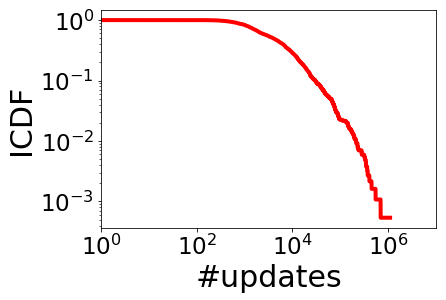

In [8]:
#Inverse cumulative density funcition

def plot_updates_per_project_icdf(count, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#updates', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1,10000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(updates_per_proj)
    
plot_updates_per_project_icdf(count, "../plots/plot_updates_per_project_icdf.svg")

<a id='Updates_Entropy_per_Project'></a>
# Updates Entropy per Project

In [80]:
#Computing update-entropy per project: agreeing vs disagreeing
#tile_updates is computed in the previous block
update_entropy_per_proj=update_entropy_per_project(tile_updates)

In [7]:
sorted_up_ent_proj = sorted(update_entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_up_ent_proj[i][0]
    up_ent = sorted_up_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Flag of Serbia , update_entropy:  0.6931470698749713 , 
desc:   

# 1 , project:  Lúcio , update_entropy:  0.6931470265813146 , 
desc:  Lúcio is a character from Overwatch (r/overwatch multiplayer first person shooter by blizzard), and, later, Heroes Of the Storm (r/heroesofthestorm, MOBA game, again, by Blizzard).<br>He's a DJ from Rio, Brazil, who uses futuristic sound-based technology to fight enemies. 

# 2 , project:  Splatoon squid , update_entropy:  0.6931469603973524 , 
desc:  A squid from the Wii U/Nintendo Switch third-person shooter series Splatoon. 

# 3 , project:  The Rise of MMA , update_entropy:  0.6931467866994165 , 
desc:  This area was contested for some time. Initially occupied by a Canadian Flag. /r/Dwarffortress initially tried to take out the flag as they expanded. However as /r/indonesia began their assault on dwarf territory, /r/dwarffortress ceded the territory to /r/mma in return for an alliance against the Indonesians. MMA had to fight with V

In [8]:

#Bottom-10
for i in range(1,11):
    proj = sorted_up_ent_proj[-i][0]
    up_ent = sorted_up_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 1 , project:  (0,0) , update_entropy:  0.19495645830996725 , 
desc:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  Mars , update_entropy:  0.2158640137962607 , 
desc:  A depiction of the Red Planet. SpaceX's stated mission is to enable the human colonization of Mars within a few decades. 

# 3 , project:  Sydney FC , update_entropy:  0.30201824565562313 , 
desc:  An A-League soccer club located in Sydney, Australia. 

# 4 , project:  Gold Codfish , update_entropy:  0.3176416297834633 , 
desc:  The /r/portugal equivalent of reddit gold. Given to topics and posts of high quality in the subreddit (mod flair) 

# 5 , project:  (Incomplete) Miles "Tails" Prower , update_entropy:  0.3230989706853863 , 
desc:  Sonic the Hedgehog's best friend and sidekick. Formerly located near The Blue Corner and nearly completed, it was unintentionally erased when The Blue Empire expanded. Reconstruction began in a new locatio

In [9]:
#AVG

print("AVG = ", np.mean(np.array(list(update_entropy_per_proj.values()))))

AVG =  0.642063611904979


In [10]:
#STD

print("STD = ", np.std(np.array(list(update_entropy_per_proj.values()))))

STD =  0.06353316181011898


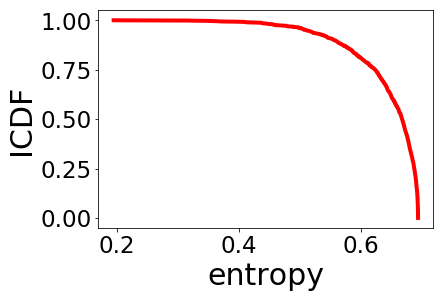

In [15]:
#Inverse cumulative density funcition
%matplotlib inline
def plot_update_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,math.log(.5)+.1, math.log(.1)))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(update_entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_update_entropies_per_project_icdf(entropy, count, "../plots/plot_update_entropies_users_icdf.svg")


<a id='Updates_Time_Entropy_per_Project'></a>
# Updates Entropy (Time) per Project

In [22]:
#Computing update-entropy per project: agreeing vs disagreeing over all the time slots (around 78 --- based on hours)
#tile_updates is computed in the previous block
update_time_entropy_per_proj=update_time_entropy_per_project(tile_updates)

In [23]:
sorted_up_time_ent_proj = sorted(update_time_entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_up_time_ent_proj[i][0]
    up_ent = sorted_up_time_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_time_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Chrono Trigger , update_time_entropy:  4.886384429016359 , 
desc:  Characters from the SNES Game Chrono Trigger. From Left to Right: Magus, Robo (Overworld), Frog, Lucca, Marle, Ayla, Catalack, Crono, Poyozo Doll, Alfador (Janus's Cat) 

# 1 , project:  Rainbow Road , update_time_entropy:  4.885425904769953 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  2007scape Memefest , update_time_entropy:  4.859832710394356 , 
desc:  Everything is this scare from Buying GF to the max cash pile are icons/memes from the game Oldschool Runescape 

# 3 , project:  The Blue Empire , update_time_entropy:  4.858888365093675 , 
desc:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half of the bottom canvas, completely in blue, with thousand of dedicated supporters. 

In [24]:
#Bottom-10
for i in range(1,11):
    proj = sorted_up_time_ent_proj[-i][0]
    up_ent = sorted_up_time_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_time_entropy: ", up_ent, ", \ndesc: ", proj, "\n")

# 1 , project:  Climber's Head (TowerClimb) , update_time_entropy:  2.2332703749380514 , 
desc:  1824 

# 2 , project:  ZUN (Touhou Project) , update_time_entropy:  2.76660808889955 , 
desc:  1784 

# 3 , project:  Flag of Madeira , update_time_entropy:  2.795325291037624 , 
desc:  1489 

# 4 , project:  Seventeen , update_time_entropy:  3.0173009882218986 , 
desc:  186 

# 5 , project:  Forsenboys , update_time_entropy:  3.018901527814546 , 
desc:  261 

# 6 , project:  Smiley Face , update_time_entropy:  3.064271096768814 , 
desc:  1419 

# 7 , project:  Karlstads International TIME Program , update_time_entropy:  3.068769843846288 , 
desc:  999 

# 8 , project:  Intersex Heart , update_time_entropy:  3.096403870637453 , 
desc:  552 

# 9 , project:  Eightfold , update_time_entropy:  3.1022566097824815 , 
desc:  1823 

# 10 , project:  Bomb Item , update_time_entropy:  3.1420220634397142 , 
desc:  1666 



In [8]:
#AVG

print("AVG = ", np.mean(np.array(list(update_time_entropy_per_proj.values()))))

AVG =  4.254925037020947


In [9]:
#STD

print("STD = ", np.std(np.array(list(update_time_entropy_per_proj.values()))))

STD =  0.32149034429668744


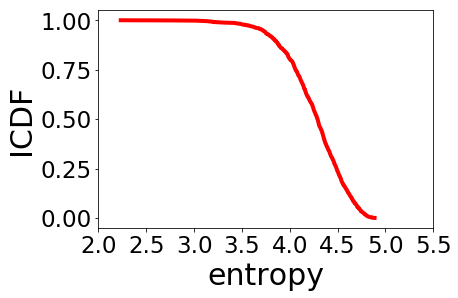

In [19]:
#Inverse cumulative density funcition
%matplotlib inline
def plot_update_time_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,math.exp(1)+.6, .69))
    ax.set_xticks(np.arange(2,6, .5))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(update_time_entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_update_time_entropies_per_project_icdf(entropy, count, "../plots/plot_update_time_entropies_users_icdf.svg")

<a id='Colors_and_Entropy_(Color)_per_Project_Original'></a>
# Colors and Entropy (Color) per Project (Original Data)

In [82]:
# Computing colors per project and entropies
#Only pixels (final) are considered.
colors_per_proj = colors_per_project(input_file_proj, projects_to_remove)
entropy_per_proj = entropy_per_project(colors_per_proj)

In [10]:
num_colors_per_proj = {}

for proj in colors_per_proj:
    num_colors_per_proj[proj] = np.count_nonzero(colors_per_proj[proj])

In [11]:
sorted_color_proj = sorted(num_colors_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  Mona Lisa , colors:  16 , 
desc:  In order to prove the point that reddit users are a cultured bunch, a group of them set out to recreate Leonardo da Vinci's Mona Lisa. 

# 1 , project:  Rainbow Road , colors:  16 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  R.I.P. Steve Irwin , colors:  16 , 
desc:  A tribute to the late Crocodile Hunter Steve Irwin, courtesy of /r/Straya. Unfortunately, Steve was vandalized a bit before the final frame of /r/place - as a result, he's got an odd smiley line where his face should be and his date of death is wrong. It should be 4/9/06. 

# 3 , project:  Australian Self Image  , colors:  16 , 
desc:  The best self image of any country in the world. Contains the man himself, Steve Irwin, Vegemite, a Koala, Spider, Snake, and naturally, a boxing Kangaroo. With the country's national collective greeting: "G'Day Cunts" 

# 4 , project:  Rainbow Ro

In [12]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  (0,0) , colors:  1 , 
desc:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  Gold Codfish , colors:  2 , 
desc:  The /r/portugal equivalent of reddit gold. Given to topics and posts of high quality in the subreddit (mod flair) 

# 3 , project:  Canadian Flag , colors:  2 , 
desc:  The flag of Canada. 

# 4 , project:  Numberphile , colors:  2 , 
desc:  One of the many Youtube channels Brady Haran runs. 

# 5 , project:  Numberphile Logo , colors:  2 , 
desc:  YouTube channel by Brady Haran focused on numbers and mathematics. 

# 6 , project:  Seventeen , colors:  2 , 
desc:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 7 , project:  Auburn University , colors:  2 , 
desc:  Auburn 

In [13]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj.values()))))

AVG =  7.119201725997843


In [14]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj.values()))))

STD =  3.74689057843588


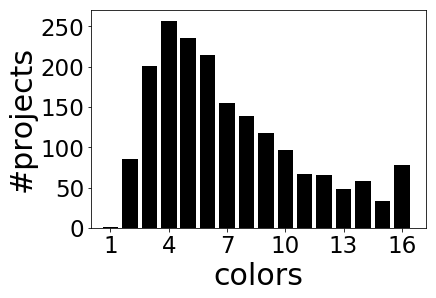

In [15]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(17)

for c in num_colors_per_proj.values():
    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_hist.svg")

In [16]:
sorted_ent_proj = sorted(entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Unfinished Place World Congress Banner , entropy:  2.571020628332455 , 
desc:  Now known as Reddit World Congress was a Discord server used by many r/place diplomats to make peace treaties with other factions. The server had as many as 2.3k users at the time of r/place going down. The banner was never finished due to the project starting too late and small number of people helping to build it. https://puu.sh/v7YrL/135381821e.png 

# 1 , project:  Rainbow Road , entropy:  2.56657965607805 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  Rainbow Road Core , entropy:  2.5664631259505044 , 
desc:  One of the earliest major faction on Place. They spread from here originally. After a while they began allowing others to build art in their space, making peace treaties and agreements with other factions 

# 3 , project:  Slushii , entropy:  2.5534266565333072 , 
desc:  Slush it up 

# 4 

In [17]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  (0,0) , entropy:  0.0 , 
desc:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  The Void , entropy:  0.3101432858015195 , 
desc:  The final core of the Void, with half of the Void's forces defending the core that destroyed Mexico, The Mona Lisa's face, The Oilers, and multiple other pixelart structures, and the other half of the Void's forces defending the Kekistan flag to the South. 

# 3 , project:  Frank Ocean - Channel Orange , entropy:  0.31716411734718 , 
desc:  Frank's 2012 album, Channel Orange. 

# 4 , project:  pr0gramm , entropy:  0.3307120958088891 , 
desc:  Icon of the german imageboard pr0gramm.com 

# 5 , project:  Erase The Place , entropy:  0.374161179110607 , 
desc:  The Purity Triangle represents what was once the grand white circle, and formed when EraseThePlace started making alliances and wasn't focused on cleaning the entire canvas. 

# 6 , project:  Faction Logo , entro

In [18]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj.values()))))

AVG =  1.311790331527323


In [19]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj.values()))))

STD =  0.4036649586729715


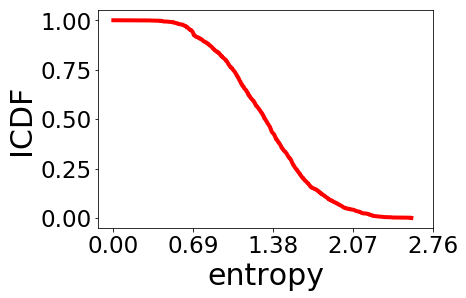

In [20]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_icdf.svg")

<a id='Colors_and_Entrpy_(Color)_per_Project_Denoised_Frequent'></a>
# Colors and Entropy (Color) per Project (Denoised Data using Frequent Color)

In [79]:
# Computing colors per project and entropies
#Only pixels (final) are considered.

colors_per_proj_den_freq = colors_per_project(input_file_proj_den_freq, projects_to_remove)
entropy_per_proj_den_freq = entropy_per_project(colors_per_proj_den_freq)

In [80]:
num_colors_per_proj_den_freq = {}

for proj in colors_per_proj_den_freq:
    num_colors_per_proj_den_freq[proj] = np.count_nonzero(colors_per_proj_den_freq[proj])

In [81]:
sorted_color_proj = sorted(num_colors_per_proj_den_freq.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  Smash Bros , colors:  16 , 
desc:  The Smash Bros canvas featuring memes popular from within the community of Super Smash Bros, a series of crossover fighting games published by Nintendo, as well as some of our favorite characters. #Kreygasm 

# 1 , project:  Touhou Hijack , colors:  16 , 
desc:  Four characters and five items from the "Touhou" series of bullet hell shooter video games; including the name of the series' creator, ZUN. 

# 2 , project:  Rocket League , colors:  16 , 
desc:  Rocket League is a vehicular soccer video game developed and published by Psyonix. 

# 3 , project:  Portugal , colors:  16 , 
desc:  Includes several Portuguese traditions, achievements and obviously memes. All done with lots of love and dedication by Portuguese redditors who loved this experience. 

# 4 , project:  Hearts , colors:  16 , 
desc:  What started with a few red hearts quickly became over one hundred hearts bearing the colors of flags and other things. 

# 5 , project:  Ch

In [82]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  (0,0) , colors:  1 , 
desc:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  Bitcoin , colors:  2 , 
desc:  The second, smaller drawing on /r/place for the cryptocurrency, Bitcoin 

# 3 , project:  Borussia Dortmund , colors:  2 , 
desc:  The badge of the German Bundesliga team Borussia Dortmund. 

# 4 , project:  Borussia Dortmund , colors:  2 , 
desc:  German soccer club. 

# 5 , project:  Borrusia Dortmund , colors:  2 , 
desc:  One of the biggest German football club based in Dortmund.  

# 6 , project:  Borussia Dortmund , colors:  2 , 
desc:  A German Football club based in DOrtmund. It's the second largest sports club by membership in Germany 

# 7 , project:  Borussia Dortmund Logo , colors:  2 , 
desc:  Borussia Dortmund is one of the most popular soccer teams in the German Bundesliga, currently ranked in 4th place. 

# 8 , project:  Borussia Dortmund , colors:  2 , 
desc:  Logo of Bo

In [83]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj_den_freq.values()))))

AVG =  6.533441208198489


In [84]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj_den_freq.values()))))

STD =  3.429158759489576


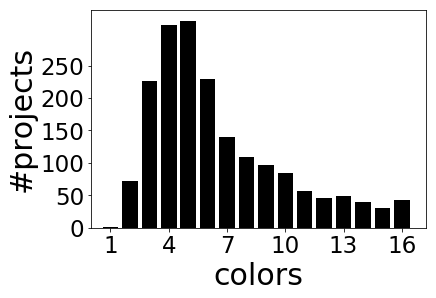

In [85]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(17)

for c in num_colors_per_proj_den_freq.values():
    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_den_freq_hist.svg")

In [86]:
sorted_ent_proj = sorted(entropy_per_proj_den_freq.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Rainbow Road Core , entropy:  2.595885435797922 , 
desc:  One of the earliest major faction on Place. They spread from here originally. After a while they began allowing others to build art in their space, making peace treaties and agreements with other factions 

# 1 , project:  Slushii , entropy:  2.5441924542151226 , 
desc:  Slush it up 

# 2 , project:  Rainbow Road , entropy:  2.5290360094831352 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 3 , project:  Unfinished Place World Congress Banner , entropy:  2.5173469467128946 , 
desc:  Now known as Reddit World Congress was a Discord server used by many r/place diplomats to make peace treaties with other factions. The server had as many as 2.3k users at the time of r/place going down. The banner was never finished due to the project starting too late and small number of people helping to build it. https://puu.sh/v7YrL/135381821e.png 

# 

In [87]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  (0,0) , entropy:  0.0 , 
desc:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  William Glitchspeare , entropy:  0.027479653339852462 , 
desc:  William Glitchspeare is an attempt by a fictional race within the game Starbound called The Glitch to reflect the personality of William Shakespeare in the form of their own civilization. 

# 3 , project:  Planetside's Attempted Invasion , entropy:  0.07664880077618422 , 
desc:  Planetside tried to recreate part of their logo here. Planetside managed to turn the corner grey. However, after much fighting Greenlattice overwhelmed and stomped out the invasion.  

# 4 , project:  The Void , entropy:  0.09037753732553422 , 
desc:  The final core of the Void, with half of the Void's forces defending the core that destroyed Mexico, The Mona Lisa's face, The Oilers, and multiple other pixelart structures, and the other half of the Void's forces defending the K

In [88]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj_den_freq.values()))))

AVG =  1.2692248752467452


In [89]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj_den_freq.values()))))

STD =  0.3943684202083034


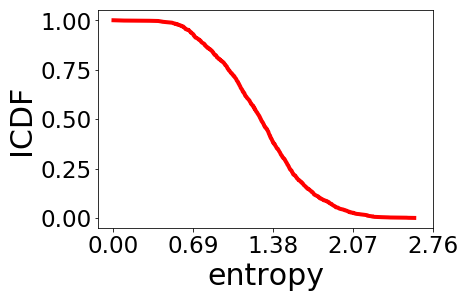

In [90]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj_den_freq.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_den_freq_icdf.svg")

<a id='Colors_and_Entropy_(Color)_per_Project_Denoised_Users'></a>
# Colors and Entropy (Color) per Project (Denoised Data using Canvas Denoised by Users)

In [92]:
# Computing colors per project and entropies
#Only pixels (final) are considered.
colors_per_proj_den_users = colors_per_project(input_file_proj_den_users, projects_to_remove)
entropy_per_proj_den_users = entropy_per_project(colors_per_proj_den_users)

In [93]:
num_colors_per_proj_den_users = {}

for proj in colors_per_proj_den_users:
    num_colors_per_proj_den_users[proj] = np.count_nonzero(colors_per_proj_den_users[proj])

In [94]:
sorted_color_proj = sorted(num_colors_per_proj_den_users.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  Entire Dutch Area , colors:  16 , 
desc:  Complete area built by Dutch subreddits 

# 1 , project:  Dutch Anthem and Royalty , colors:  16 , 
desc:  First part of the Dutch Anthem and their King and Queen, Willem & Maxima 

# 2 , project:  Rainbow Road , colors:  16 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 3 , project:  Pharah from Overwatch , colors:  16 , 
desc:  Pharah is one of the playable characters in Overwatch, a team-based multiplayer first-person shooter video game developed and published by Blizzard Entertainment. 

# 4 , project:  CAPTHA , colors:  16 , 
desc:  TO SHOW THE WORLD THAT ONLY HUMANS WERE INVOLVED IN DRAWING THIS MASTERPIECE R/TOTALLYNOTROBOTS STARTED TO DRAW A RECAPTCHA 

# 5 , project:  ReCaptcha , colors:  16 , 
desc:  This block was planned to contain a picture of a ReCaptcha, to refer to the high amount of script usage in /r/place. However, this project wa

In [95]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  Imgur logo , colors:  1 , 
desc:  It is very small 

# 2 , project:  Remnants of the /r/PictureGame Kiwi , colors:  1 , 
desc:  The original /r/PictureGame Kiwi was located here. Its remnants such as the beak /r/PICT and the PictureFrame(the snoo) are still visible. 

# 3 , project:  Amaura , colors:  1 , 
desc:  The head of the Generation 6 Fossil Pokémon Amaura. The body was covered up by surrounding art. 

# 4 , project:  (Former) Tiny Trump , colors:  1 , 
desc:  Early on in /r/place, the Donald Trump subreddit made a tiny Trump picture.  Shortly after construction, it got vandalized heavily with random pixels by the rest of reddit until it was finally abandoned. 

# 5 , project:  The Donald's Head , colors:  1 , 
desc:  /r/The_Donald encouraged it's members to contribute to a likeness of President Trump wearing a suit, a red tie and a red ball cap. Other /r/place users worked against that effort. All that's left now is a little orange hair, some yellow face, and th

In [96]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj_den_users.values()))))

AVG =  6.2238403451995685


In [97]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj_den_users.values()))))

STD =  3.522780407540763


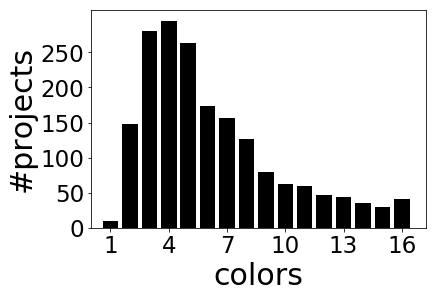

In [98]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(17)

for c in num_colors_per_proj_den_users.values():
    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_den_users_hist.svg")

In [99]:
sorted_ent_proj = sorted(entropy_per_proj_den_users.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Rainbow Road Core , entropy:  2.5783186576151724 , 
desc:  One of the earliest major faction on Place. They spread from here originally. After a while they began allowing others to build art in their space, making peace treaties and agreements with other factions 

# 1 , project:  Rainbow Road , entropy:  2.5673212602349476 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  Slushii , entropy:  2.5193511459524096 , 
desc:  Slush it up 

# 3 , project:  The Flag of Mexico , entropy:  2.480593659684477 , 
desc:  This is an attempt at creating a Mexican flag. Unfortunately, it was overtaken by other projects. 

# 4 , project:  Portal , entropy:  2.4765859036777584 , 
desc:  A portal from the game Portal by Valve. This portal and its matching orange end was drawn by /r/ainbowroad to protect a Waldo drawing from being overrun by the rainbow. The orange portal and Waldo are now mostly go

In [100]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  Imgur logo , entropy:  0.0 , 
desc:  It is very small 

# 2 , project:  Remnants of the /r/PictureGame Kiwi , entropy:  0.0 , 
desc:  The original /r/PictureGame Kiwi was located here. Its remnants such as the beak /r/PICT and the PictureFrame(the snoo) are still visible. 

# 3 , project:  Amaura , entropy:  0.0 , 
desc:  The head of the Generation 6 Fossil Pokémon Amaura. The body was covered up by surrounding art. 

# 4 , project:  (Former) Tiny Trump , entropy:  0.0 , 
desc:  Early on in /r/place, the Donald Trump subreddit made a tiny Trump picture.  Shortly after construction, it got vandalized heavily with random pixels by the rest of reddit until it was finally abandoned. 

# 5 , project:  The Donald's Head , entropy:  0.0 , 
desc:  /r/The_Donald encouraged it's members to contribute to a likeness of President Trump wearing a suit, a red tie and a red ball cap. Other /r/place users worked against that effort. All that's left now is a little orange hair, some yell

In [101]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj_den_users.values()))))

AVG =  1.2686344219019232


In [102]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj_den_users.values()))))

STD =  0.42230910443998987


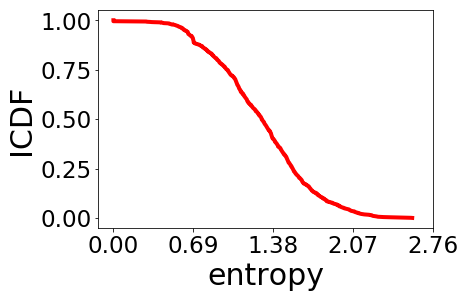

In [103]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj_den_users.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_den_users_icdf.svg")

<a id='Pixels_per_Project'></a>
# Pixels per Project

In [13]:
# Computing number of pixels per project
#Only pixels (final) are considered.
pixels_per_proj = pixels_per_project(input_file_proj, projects_to_remove)

In [13]:
sorted_pixel_proj = sorted(pixels_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_pixel_proj[i][0]
    pix = sorted_pixel_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", pixels: ", pix, ", \ndesc: ", desc, "\n")

# 0 , project:  Rainbow Road , pixels:  88478 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 1 , project:  Entire Dutch Area , pixels:  33887 , 
desc:  Complete area built by Dutch subreddits 

# 2 , project:  Darth Plagueis The Wise , pixels:  21778 , 
desc:  One of the first additions to the map, this text of a meme from the prequel Star Wars movies started out as an uncoordinated attempt to write something everyone knew, and was refined to the masterpiece you see today. 

# 3 , project:  Hearts , pixels:  19036 , 
desc:  What started with a few red hearts quickly became over one hundred hearts bearing the colors of flags and other things. 

# 4 , project:  Flag of Sweden , pixels:  18958 , 
desc:   

# 5 , project:  Rainbow Road Core , pixels:  18343 , 
desc:  One of the earliest major faction on Place. They spread from here originally. After a while they began allowing others to build art in their spac

In [14]:
#Bottom-10

for i in range(1,11):
    proj = sorted_pixel_proj[-i][0]
    pix = sorted_pixel_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", pixels: ", pix, ", \ndesc: ", desc, "\n")

# 1 , project:  (0,0) , pixels:  1 , 
desc:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  The purple corner , pixels:  9 , 
desc:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 3 , project:  Eightfold , pixels:  15 , 
desc:  What remains of Eightfold, a paper spider character from a webcomic called Paranatural. 

# 4 , project:  Stealth Pepe , pixels:  15 , 
desc:  Pepe the frog was placed and overwritten with prejudice many times, but this one survived by being tiny, the rarest of them all 

# 5 , project:  Remains of r/ockytop , pixels:  16 , 
desc:  After the r/ockytop and El Bandito alliance was botted 

In [15]:
#AVG

print("AVG = ", np.mean(np.array(list(pixels_per_proj.values()))))

AVG =  892.3310048361096


In [16]:
#STD

print("STD = ", np.std(np.array(list(pixels_per_proj.values()))))

STD =  2799.6327140798035


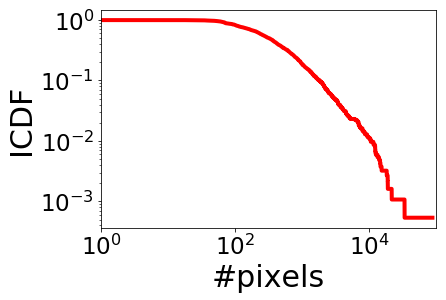

In [17]:
%matplotlib inline
def plot_pixels_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1,100000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
count = icdf(pixels_per_proj)
    
plot_pixels_per_project_icdf(count, "../plots/plot_pixels_icdf.svg")

<a id='Projects_per_User'></a>
# Projects per User

In [12]:
#Projects per User
#Only updates that agree with the final color of the tile are considered
proj_per_user = projects_per_user(input_file_proj, projects_to_remove)

In [14]:
sorted_proj_per_user = sorted(proj_per_user.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    user = sorted_proj_per_user[i][0]
    n = sorted_proj_per_user[i][1]
    
    print("#", i, ", user: ", user, ", projects: ", n)

# 0 , user:  gIIoT+oPbML64+byH2Ms6FIj1sM= , projects:  126
# 1 , user:  Ij3o7pMe0KXqHHkMpLYeZY3lJpU= , projects:  95
# 2 , user:  oV/QBQVpRBPm5K4UoK73KXfcG0o= , projects:  94
# 3 , user:  ZSPEY69+JkkBBY/a3gb/jUvXIgA= , projects:  83
# 4 , user:  NPRAwHkxG3WBneXIpPgRvWXEBJE= , projects:  78
# 5 , user:  8xow27kDaned3b13ENiuQT9fmRE= , projects:  78
# 6 , user:  OsnDa+2E+woJy7TN3U87yLQrbu8= , projects:  72
# 7 , user:  wxcRqPge/H2RnT5msZNmnCGxQUM= , projects:  70
# 8 , user:  lnmjEGEWgq+s9joisWlkVYoEaUA= , projects:  69
# 9 , user:  RfWg9AaIkgiQAB+CsEEdaWqqp0g= , projects:  67


In [15]:
#Bottom-10

for i in range(1,11):
    user = sorted_proj_per_user[-i][0]
    n = sorted_proj_per_user[-i][1]
    
    print("#", i, ", user: ", user, ", projects: ", n)

# 1 , user:  O3rlOmb0o2qZie8tKKHl9smeUPw= , projects:  1
# 2 , user:  lgaE/V/9zREHrLMuFIswAvPxmew= , projects:  1
# 3 , user:  0c9D13zQkmgdniU8XVu4pXKcJIs= , projects:  1
# 4 , user:  fr+MDTWZFDofL7m2dBrNo70425Y= , projects:  1
# 5 , user:  zb4RPTmWb/00azu/FDHIEk9uJd4= , projects:  1
# 6 , user:  c/xCGHwfKIw5TZaKYv7kxl32H2A= , projects:  1
# 7 , user:  C02kpVSohDxkvU6+zEOk8XkLi+0= , projects:  1
# 8 , user:  RdnLjaedTkAdtiGNFiN90KvMFDo= , projects:  1
# 9 , user:  FFM2JLPM+c7EpK+xSwcMCyefTpo= , projects:  1
# 10 , user:  Ln9kGeSN2q2HB80ktOZHM1eahmw= , projects:  1


In [16]:
#AVG

print("AVG = ", np.mean(np.array(list(proj_per_user.values()))))

AVG =  4.666462789950916


In [17]:
#STD

print("STD = ", np.std(np.array(list(proj_per_user.values()))))

STD =  4.625666396384493


In [18]:
#Median

print("Median = ", np.median(np.array(list(proj_per_user.values()))))

Median =  3.0


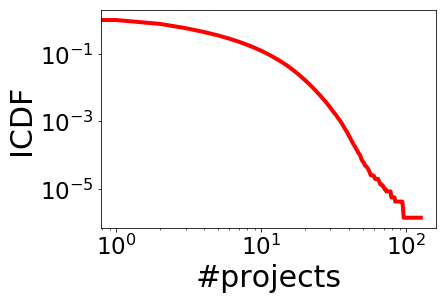

In [23]:
%matplotlib inline
def plot_projects_per_user_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#projects', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(proj_per_user)

plot_projects_per_user_icdf(count, "../plots/plot_proj_user_icdf.svg")

<a id='Users_per_Project'></a>

# Users per Project

In [27]:
# Users per Project
#Only updates that aggree with the final color of the tile are considered
users_per_proj = users_per_project(input_file_proj, projects_to_remove)   

In [54]:
sorted_users_per_proj = sorted(users_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_users_per_proj[i][0]
    n = sorted_users_per_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", users: ", n, ", \ndesc: ", desc, "\n")

# 0 , project:  Rainbow Road , users:  129675 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 1 , project:  USA / Canvas Center , users:  80931 , 
desc:  The center of the canvas was a controversial and disputed part of r/place. It began to be filled with numerous randomly placed pixels. As organized groups began creating masterpieces, the center began a white void, part of r/erase. As the original (dark) Void began to eat the center of the canvas, the USA Flag began to take shape covering a branch from the void. The flag took over the white void and a few projects including a smiley and a tree. Then the void reappeared in place and with other people erased most of the flag as RainbowRoad expanded where the flag was. Ireland saw an opportunity  and decided to expand as well. A net of yellow lines appeared and took over the void and r/AmericanFlaginPlace with help of r/TheDonald and other redditors, helped f

In [55]:
#Bottom-10

for i in range(1,11):
    proj = sorted_users_per_proj[-i][0]
    n = sorted_users_per_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", users: ", n, ", \ndesc: ", desc, "\n")

# 1 , project:  Smiley Face , users:  6 , 
desc:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 2 , project:  The R , users:  7 , 
desc:  The R of the sub r/The_R 

# 3 , project:  BIGBANG , users:  9 , 
desc:  BIGBANG is a South Korean boy group who debuted in 2006 under YG Entertainment. The group, consisting of members T.O.P, Taeyang, Daesung, Seungri and leader G-Dragon are often labelled the 'Kings of K-pop' and can be considered the most influential boy group within Asia. Pictured to the left is the Bigbang crown which sits atop of the lightsticks which their fans (VIPs) wave and Bigbang concerts. 

# 4 , project:  CUL , users:  9 , 
desc:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
This masterpiece is the work of Marvolo and Nicho. This is our gift to the internet. 

# 5 , project:  Bread , users:  9 , 
desc:  It's bread. 

# 6 , project:  Bread , users:  10 , 
desc:  A loaf o

In [56]:
#AVG

print("AVG = ", np.mean(np.array(list(users_per_proj.values()))))

AVG =  1810.680690399137


In [57]:
#STD

print("STD = ", np.std(np.array(list(users_per_proj.values()))))

STD =  5581.761266821517


In [28]:
#Median
print("Median = ", np.median(np.array(list(users_per_proj.values()))))

Median =  445.0


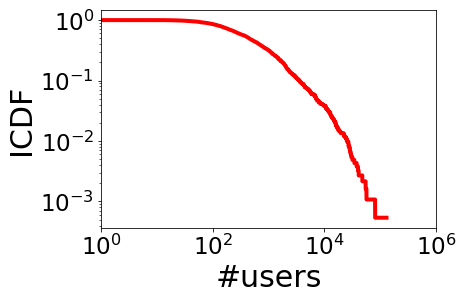

In [64]:
%matplotlib inline
def plot_users_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1, 1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(users_per_proj)

plot_users_per_project_icdf(count, "../plots/plot_user_proj_icdf.svg")

<a id='Time_per_Project'></a>
# Time per Project

In [48]:
#Time per project
#Only updates that aggree with the final color of the tile are considered
times_per_proj = times_per_project(input_file_proj, projects_to_remove)

In [76]:
sorted_times_per_proj = sorted(times_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_times_per_proj[i][0]
    t = sorted_times_per_proj[i][1] / (1000 * 60 * 60)
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", time: ", t, ", \ndesc: ", desc, "\n")

# 0 , project:  USA / Canvas Center , time:  88.87472222222222 , 
desc:  The center of the canvas was a controversial and disputed part of r/place. It began to be filled with numerous randomly placed pixels. As organized groups began creating masterpieces, the center began a white void, part of r/erase. As the original (dark) Void began to eat the center of the canvas, the USA Flag began to take shape covering a branch from the void. The flag took over the white void and a few projects including a smiley and a tree. Then the void reappeared in place and with other people erased most of the flag as RainbowRoad expanded where the flag was. Ireland saw an opportunity  and decided to expand as well. A net of yellow lines appeared and took over the void and r/AmericanFlaginPlace with help of r/TheDonald and other redditors, helped fight for their territory and reconstruct the USA Flag. "E Pluribus Unum" on the side 

# 1 , project:  The First Void , time:  87.44777777777777 , 
desc:  The pl

In [67]:
#Bottom-10

for i in range(1,11):
    proj = sorted_times_per_proj[-i][0]
    t = sorted_times_per_proj[-i][1] / (1000 * 60 * 60)
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", time: ", t, ", \ndesc: ", desc, "\n")

# 1 , project:  Seventeen , time:  10.676111111111112 , 
desc:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 2 , project:  Make Trade Fair , time:  16.12527777777778 , 
desc:  An organization supported by frontman Chris Martin of Coldplay drawn by the nearby Coldplay redditors. 

# 3 , project:  TOPS , time:  21.069166666666668 , 
desc:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 4 , project:  Lesbian Heart , time:  39.355555555555554 , 
desc:  A heart created by /r/TransFlagPlace to represent lesbians, women who are attracted to women. 

# 5 , project:  Tetris , time:  39.6825 , 
desc:  Depicts all 7 tetris pieces 

# 6 , project:  Smiley Face , time:  41.765 , 
desc:  A universal symbol of happiness rendered on a small scale fo

In [68]:
#AVG (hours)

print("AVG = ", np.mean(np.array(list(times_per_proj.values())))/(1000 * 60 * 60))

AVG =  69.86087558432219


In [69]:
#STD (hours)

print("STD = ", np.std(np.array(list(times_per_proj.values())))/(1000 * 60 * 60))

STD =  3.844378593733623


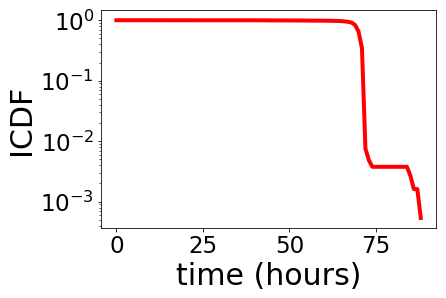

In [78]:
%matplotlib inline
def plot_times_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.semilogy(np.arange(count.shape[0]), count, color="red", linewidth=4) #millisecons to hours
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,101,25))
    #ax.set_xlim(None, 100)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
times_per_proj_hours = {}

for proj in times_per_proj:
    times_per_proj_hours[proj] = int(times_per_proj[proj] / (1000 * 60 * 60))

count = icdf(times_per_proj_hours)

plot_times_per_project_icdf(count, "../plots/plot_time_proj_icdf.svg")

<a id='Area_per_Project'></a>
# Area per Project

In [65]:
#Area per project (area is between 0 to 1)
#input_file_proj= "../data/sorted_tile_placements_proj.csv"
area_per_proj = area_per_project(input_file_proj,projects_to_remove)

In [66]:
sorted_area_per_proj = sorted(area_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_area_per_proj[i][0]
    a = sorted_area_per_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", area: ", a, ", \ndesc: ", desc, "\n")

# 0 , project:  Flag of Switzerland , area:  1.0 , 
desc:   

# 1 , project:  Flag of Lithuania , area:  1.0 , 
desc:   

# 2 , project:  Lego , area:  1.0 , 
desc:  Lego is a line of plastic construction toys made in Denmark. 

# 3 , project:  Trogdor the Burninator , area:  1.0 , 
desc:  Trogdor the Burninator is a figure from the Homestar Runner internet cartoon series. 

# 4 , project:  Factorio , area:  1.0 , 
desc:  Factorio is a real-time strategy video game with base-building and management elements developed by Wube Software. 

# 5 , project:  European Union , area:  1.0 , 
desc:  After a long battle between /r/france and /r/de, both parties negotiated peace and placed the flag of the EU with a dove of peace on the disputed territory. 

# 6 , project:  Flag of Germany , area:  1.0 , 
desc:   

# 7 , project:  Flag of Germany , area:  1.0 , 
desc:   

# 8 , project:  Flag of South Africa , area:  1.0 , 
desc:   

# 9 , project:  Flag of Belgium , area:  1.0 , 
desc:   



In [67]:

#Bottom-10
for i in range(1,11):
    proj = sorted_area_per_proj[-i][0]
    a = sorted_area_per_proj[-i][1] 
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", area: ", a, ", \ndesc: ", desc, "\n")

# 1 , project:  The Dutch Border , area:  0.060002013490385586 , 
desc:  The dutch border flag was used by the Netherlands to indicate their territory. Some of the Dutch planned to overtake the triangular area in this corner, with the Unregistered HyperCam 2, Rainbow Road and the right edge as borders. However, after some discussion of the Dutch diplomats with the makers of Pharah this plan was cancelled and an agreement was made not to expand in their direction. The first made steps of this plan, the orange colour and the border flag, still remains. 

# 2 , project:  Transgender flag , area:  0.06001669648181276 , 
desc:  A cross-shape in the colors of the transgender flag, representing people who do not identify with the gender they were assigned. Due to the fact that it's spanning the entire canvas, this piece was also called the Transcontinental Railroad. 

# 3 , project:  /r/parahumans worm , area:  0.06153541749109616 , 
desc:  It's a worm created by the subreddit /r/parahumans.


In [68]:
#AVG 

print("AVG = ", np.mean(np.array(list(area_per_proj.values()))))

AVG =  0.8026906627867517


In [69]:
#STD 

print("STD = ", np.std(np.array(list(area_per_proj.values())))/(1000 * 60 * 60))

STD =  5.3191701853999e-08


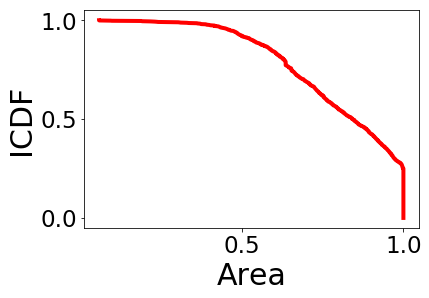

In [79]:
%matplotlib inline
def plot_area_per_project_icdf(area, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(area, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('Area', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,101,25))
    #ax.set_xlim(None, 100)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
    
#Computing ICDF
area = sorted(list(area_per_proj.values()))
count = np.arange(len(area)+1)[len(area)+1:0:-1]
count = count / count[0]


plot_area_per_project_icdf(area,count, "../plots/plot_area_proj_icdf.svg")

# Two Variables

<a id='Update_vs_Entropy'></a>
# Update vs Entropy

In [30]:
#Updates vs. entropy 
X,Y = Create_Array(updates_per_proj,entropy_per_proj)

#Updates vs.entropy: ratio and ID
ratios, IDs = Ratio(updates_per_proj,entropy_per_proj, names)


In [31]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [32]:
#Correlation
np.corrcoef(X, Y)

array([[1.       , 0.1449866],
       [0.1449866, 1.       ]])

In [33]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", entropy: ", ent, ", updates: ", up, ", entropy/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Red P , entropy:  1.2226561670871259 , updates:  126 , entropy/update:  0.009703620373707348         , 
description:  Seeing the whole work was an amazing piece of modern art, I really wanted to be a part of it. I decided to find a small unused spot and put my initial there. The void and erase factions were savage and had wiped two previous efforts and a larger piece of art I was helping maintain, so I found a spot and used a script running on 2 PC's to maintain my small part of the artwork until place ended, which happened while I was sleeping. 

# 1 , project:  Tiny danish flag , entropy:  1.0821955300387671 , updates:  112 , entropy/update:  0.00966246008963185         , 
description:  denmark is a samll nation in the nothern part of europe 

# 2 , project:  Italy heart , entropy:  1.1115310092213608 , updates:  128 , entropy/update:  0.008683836009541882         , 
description:  A random heart or a symbol of cooperation between Scott Pilgrim and Italy? 

# 3 , proje

In [34]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", updates: ", up, ", entropy/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  (0,0) , entropy:  0.0 , updates:  9099 , entropy/update:  0.0         , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  The Blue Corner , entropy:  0.4897081198748957 , updates:  363150 , entropy/update:  1.348500949676155e-06         , 
description:  The Blue Corner was one of the earliest projects on /r/place.<br>It quickly grew to cover a significant part of the map, but later was pushed back to its current size. 

# 3 , project:  RuneScape disconnected message , entropy:  0.42979017472032577 , updates:  239336 , entropy/update:  1.7957606658435245e-06         , 
description:  This message is displayed when an user loses connection to the server in the MMORPG Runescape. Built by /r/runescape and /r/2007scape. 

# 4 , project:  USA / Canvas Center , entropy:  1.3234871677338056 , updates:  693586 , entropy/update:  1.9081803377429846e-06         , 
description:  The center of 

<Figure size 432x288 with 0 Axes>

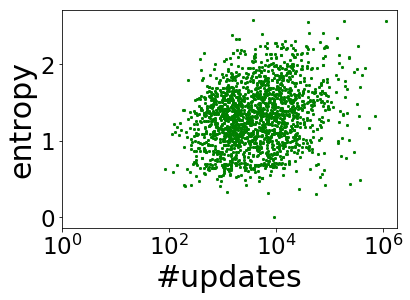

In [35]:
%matplotlib inline

def plot_updates_vs_entropy(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    #ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(1,None)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_entropy(X, Y, "../plots/plot_updates_vs_entropy.svg")

In [36]:
#Showing project IDs on mouse hovering. Based on:
#https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

%matplotlib tk
cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Update_vs_Pixels'></a>
# Update vs Pixel

In [37]:
#Updates vs. Pixels 
X,Y = Create_Array(updates_per_proj,pixels_per_proj)


#Updates vs. pixels: ratio and ID
ratios, IDs = Ratio(updates_per_proj,pixels_per_proj, names)

In [38]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [39]:
#Correlation
np.corrcoef(X, Y)

array([[1.        , 0.87080598],
       [0.87080598, 1.        ]])

In [40]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    pix = pixels_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", pixels: ", pix, ", updates: ", up, ", pixels/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Seplunky , pixels:  370 , updates:  937 , pixels/update:  0.39487726787620064         , 
description:  Player character from the platform indie game Spelunky. 

# 1 , project:  Bread , pixels:  87 , updates:  225 , pixels/update:  0.38666666666666666         , 
description:  It's bread. 

# 2 , project:  Bread , pixels:  70 , updates:  183 , pixels/update:  0.3825136612021858         , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 3 , project:  Amaura , pixels:  50 , updates:  142 , pixels/update:  0.352112676056338         , 
description:  The head of the Generation 6 Fossil Pokémon Amaura. The body was covered up by surrounding a

In [41]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    pix = pixels_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", pixels: ", pix, ", updates: ", up, ", pixels/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  (0,0) , pixels:  1 , updates:  9099 , pixels/update:  0.00010990218705352236         , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  The purple corner , pixels:  9 , updates:  20703 , pixels/update:  0.000434719605854224         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 3 , project:  Trans Heart , pixels:  61 , updates:  20308 , pixels/update:  0.003003742367539886         , 
description:  The first heart created by /r/TransFlagPlace, marking the centerpoint of the flag. 

# 4 , project:  Hammer and Sickle , pixels:  839 , updates:  169074 , pixels/update: 

<Figure size 432x288 with 0 Axes>

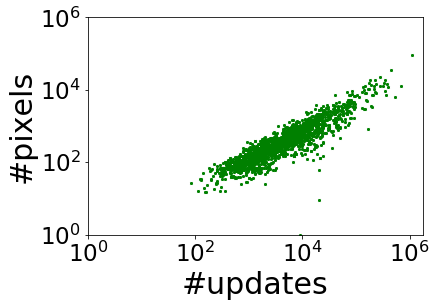

In [42]:
%matplotlib inline

def plot_updates_vs_pixels(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,1000000)
    ax.set_xlim(1,None)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_pixels(X, Y, "../plots/plot_updates_vs_pixels.svg")

In [43]:
#Showing project IDs on mouse hovering. Based on:
#https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#pixels', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,None)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Update_vs_User'></a>
# Update vs User

In [44]:
#Updates vs. users per project
X,Y = Create_Array(updates_per_proj, users_per_proj)

#Updates vs. users: ratio and ID
ratios, IDs = Ratio(updates_per_proj,users_per_proj, names)

In [45]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [46]:
#Correlation
np.corrcoef(X, Y)

array([[1.        , 0.96049896],
       [0.96049896, 1.        ]])

In [47]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", updates: ", up, ", users/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Juke Juice power-up , users:  346 , updates:  817 , users/update:  0.423500611995104         , 
description:  Juke Juice allows you to accelerate and reach your maximum speed at faster rates, making it easier to avoid contact with other players and escape tricky situations. 

# 1 , project:  73 and 35 , users:  975 , updates:  2581 , users/update:  0.37776055792328556         , 
description:  73 and 35 refers to an Oldschool Runescape PKer B0aty.<br>73 refers to an old vide of his where his friend bets him he won't die to a weapon when he is at 73 health, and immediately after gets hit a 73.<br>35 refers to him getting hit with an obscure weapon called a Dragon Warhammer during his stream of Deadman mode, a special PvP mode of Oldschool Runescape. 

# 2 , project:  The Swiss Heart , users:  249 , updates:  664 , users/update:  0.375         , 
description:  The heart of Switzerland, defended by /r/SwissNeutralityZone 

# 3 , project:  The Tree , users:  266 , updates:  

In [48]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", updates: ", up, ", users/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  A-NI , users:  42 , updates:  1970 , users/update:  0.02131979695431472         , 
description:  Anti-Nub Incorporated (A-NI) is an EVE: Online based corporation, branching out to other games such as Dota 2. 

# 2 , project:  Mars , users:  194 , updates:  9033 , users/update:  0.0214768072622606         , 
description:  A depiction of the Red Planet. SpaceX's stated mission is to enable the human colonization of Mars within a few decades. 

# 3 , project:  Parrot , users:  122 , updates:  5589 , users/update:  0.021828591876901057         , 
description:   Our cute little birb.  Drawn by members of /r/Parrots. 

# 4 , project:  Sydney FC , users:  52 , updates:  2005 , users/update:  0.02593516209476309         , 
description:  An A-League soccer club located in Sydney, Australia. 

# 5 , project:  Eric Cartman , users:  24 , updates:  925 , users/update:  0.025945945945945945         , 
description:  Character from Southpark 

# 6 , project:  The Earth , users:  30 , 

<Figure size 432x288 with 0 Axes>

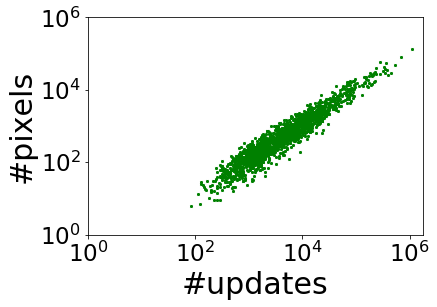

In [49]:
%matplotlib inline

def plot_updates_vs_pixels(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,1000000)
    ax.set_xlim(1,None)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_pixels(X, Y, "../plots/plot_updates_vs_users.svg")

In [50]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#users', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,None)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Update_vs_Time'></a>
# Update vs Time

In [51]:

#Updates vs. time per project
X,Y = Create_Array(updates_per_proj, times_per_proj)

#Updates vs. time: ratio and ID
ratios, IDs = Ratio(updates_per_proj,times_per_proj, names)

In [52]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [53]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.18269524],
       [0.18269524, 1.        ]])

In [54]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/ (1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", updates: ", up, ", times/update: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 0 , project:  Tiny danish flag , time:  65.10416666666667 , updates:  112 , times/update:  0.5812872023809524         , 
description:  denmark is a samll nation in the nothern part of europe 

# 1 , project:  The R , time:  65.53111111111112 , updates:  121 , times/update:  0.5415794306703398         , 
description:  The R of the sub r/The_R 

# 2 , project:  Italy heart , time:  68.73277777777778 , updates:  128 , times/update:  0.5369748263888889         , 
description:  A random heart or a symbol of cooperation between Scott Pilgrim and Italy? 

# 3 , project:  Red P , time:  66.35027777777778 , updates:  126 , times/update:  0.5265895061728395         , 
description:  Seeing the whole work was an amazing piece of modern art, I really wanted to be a part of it. I decided to find a small unused spot and put my initial there. The void and erase factions were savage and had wiped two previous efforts and a larger piece of art I was helping maintain, so I found a spot and used a scrip

In [55]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/ (1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", updates: ", up, ", times/update: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 1 , project:  Rainbow Road , time:  73.80277777777778 , updates:  1098333 , times/update:  6.71952657142941e-05         , 
description:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  USA / Canvas Center , time:  88.87472222222222 , updates:  693586 , times/update:  0.00012813799906892905         , 
description:  The center of the canvas was a controversial and disputed part of r/place. It began to be filled with numerous randomly placed pixels. As organized groups began creating masterpieces, the center began a white void, part of r/erase. As the original (dark) Void began to eat the center of the canvas, the USA Flag began to take shape covering a branch from the void. The flag took over the white void and a few projects including a smiley and a tree. Then the void reappeared in place and with other people erased most of the flag as RainbowRoad expanded where the flag was. Ireland saw an opportunit

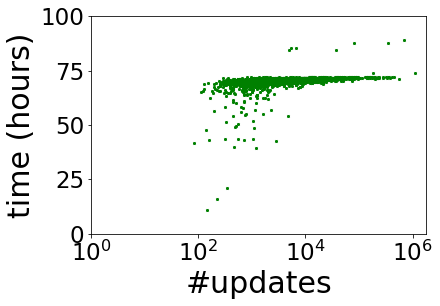

In [56]:
%matplotlib inline
Y=Y/ (1000 * 60 * 60)
def plot_updates_vs_times(X, Y, output_file_name):
    plt.clf()
    ax = plt.subplot()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_xlim(1,None)
    ax.set_ylim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_times(X, Y, "../plots/plot_updates_vs_times.svg")

In [57]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_xlim(1,None)
ax.set_ylim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Update_vs_Area'></a>
# Update vs Area

In [16]:
#Updates vs. area per project
X,Y = Create_Array(updates_per_proj, area_per_proj)

#Updates vs. time: ratio and ID
ratios, IDs = Ratio(updates_per_proj,area_per_proj, names)

In [17]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [18]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.08348172],
       [-0.08348172,  1.        ]])

In [20]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ar = area_per_proj[proj] 
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", updates: ", up, ", area/update: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  Tiny danish flag , area:  1.0 , updates:  112 , area/update:  0.008928571428571428         , 
description:  denmark is a samll nation in the nothern part of europe 

# 1 , project:  Smiley Face , area:  0.75 , updates:  84 , area/update:  0.008928571428571428         , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 2 , project:  The R , area:  1.0 , updates:  121 , area/update:  0.008264462809917356         , 
description:  The R of the sub r/The_R 

# 3 , project:  Red P , area:  1.0 , updates:  126 , area/update:  0.007936507936507936         , 
description:  Seeing the whole work was an amazing piece of modern art, I really wanted to be a part of it. I decided to find a small unused spot and put my initial there. The void and erase factions were savage and had wiped two previous efforts and a larger piece of art I was helping maintain, so I found a spot and used a script running on 2 PC's to maintain my small part of 

In [21]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ar = area_per_proj[proj] 
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", updates: ", up, ", area/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  Rainbow Road , area:  0.09921175423454526 , updates:  1098333 , area/update:  9.032939394022146e-08         , 
description:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  Transgender flag , area:  0.06001669648181276 , updates:  279297 , area/update:  2.1488485906333673e-07         , 
description:  A cross-shape in the colors of the transgender flag, representing people who do not identify with the gender they were assigned. Due to the fact that it's spanning the entire canvas, this piece was also called the Transcontinental Railroad. 

# 3 , project:  Entire Dutch Area , area:  0.41434096629627354 , updates:  448691 , area/update:  9.234438985766898e-07         , 
description:  Complete area built by Dutch subreddits 

# 4 , project:  The Green Lattice , area:  0.23979696472518458 , updates:  231601 , area/update:  1.035388295927844e-06         , 
description:  A collective who aimed 

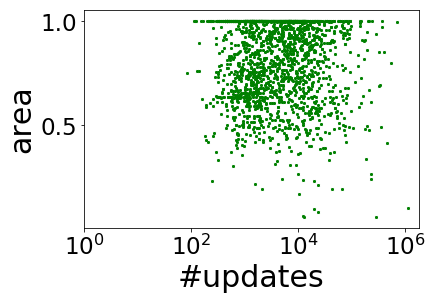

In [28]:
%matplotlib inline
def plot_updates_vs_area(X, Y, output_file_name):
    plt.clf()
    ax = plt.subplot()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_xlim(1,None)
    #ax.set_ylim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_area(X, Y, "../plots/plot_updates_vs_area.svg")

5

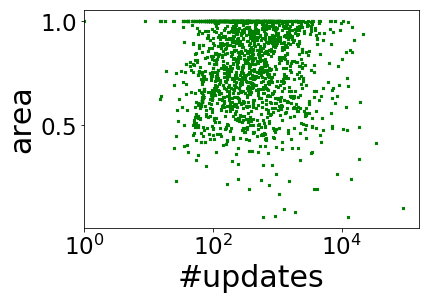

In [38]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_xlim(1,None)
#ax.set_ylim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Entropy'></a>
# Pixels vs Entropy

In [58]:
#Pixels vs. entropy per project
X,Y = Create_Array(pixels_per_proj, entropy_per_proj)

#Pixels vs. entropy: ratio and ID
ratios, IDs = Ratio(pixels_per_proj,entropy_per_proj, names)

In [59]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [60]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.19649315],
       [0.19649315, 1.        ]])

In [61]:
#Entropy/pixel
  
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", pixels: ", pix, ", entropy/pixel: ", r, "\
        , \ndescription: ", desc, "\n")     

# 0 , project:  The purple corner , entropy:  1.2148896539491205 , pixels:  9 , entropy/pixel:  0.13498773932768005         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 1 , project:  Eightfold , entropy:  1.2293362159076602 , pixels:  15 , entropy/pixel:  0.08195574772717734         , 
description:  What remains of Eightfold, a paper spider character from a webcomic called Paranatural. 

# 2 , project:  Stealth Pepe , entropy:  1.0775733728921972 , pixels:  15 , entropy/pixel:  0.07183822485947981         , 
description:  Pepe the frog was placed and overwritten with prejudice many times, but this one survived by being tiny, the rarest of them all 

# 3 , project:  Tin

In [62]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", pixels: ", pix, ", entropy/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  (0,0) , entropy:  0.0 , pixels:  1 , entropy/pixel:  0.0         , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  Rainbow Road , entropy:  2.56657965607805 , pixels:  88478 , entropy/pixel:  2.90081111245513e-05         , 
description:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 3 , project:  Darth Plagueis The Wise , entropy:  0.847417728798278 , pixels:  21778 , entropy/pixel:  3.8911641509701447e-05         , 
description:  One of the first additions to the map, this text of a meme from the prequel Star Wars movies started out as an uncoordinated attempt to write something everyone knew, and was refined to the masterpiece you see today. 

# 4 , project:  RuneScape disconnected message , entropy:  0.42979017472032577 , pixels:  7980 , entropy/pixel:  5.3858417884752604e-05         , 
description:  This

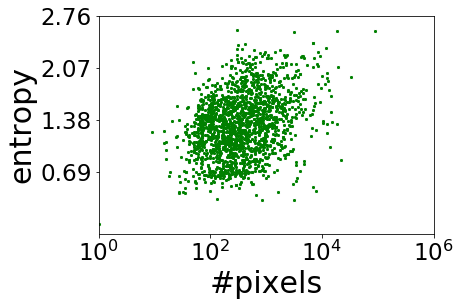

In [63]:
%matplotlib inline
def plot_pixels_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xscale('log')
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_entropy(X, Y, "../plots/plot_pixels_vs_entropy.svg")

In [64]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xscale('log')
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Pixels_vs_Users'></a>
# Pixels vs Users

In [15]:
#Pixels vs. users per project
X,Y = Create_Array(pixels_per_proj, users_per_proj)

#Pixels vs. users: ratio and ID
ratios, IDs = Ratio(pixels_per_proj,users_per_proj, names)

In [66]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [67]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.84550021],
       [0.84550021, 1.        ]])

In [68]:
#users/pixel
  
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    usr = users_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", pixels: ", pix, ", users/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  The purple corner , users:  3689 , pixels:  9 , users/pixel:  409.8888888888889         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 1 , project:  (0,0) , users:  380 , pixels:  1 , users/pixel:  380.0         , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  Trans Heart , users:  3049 , pixels:  61 , users/pixel:  49.98360655737705         , 
description:  The first heart created by /r/TransFlagPlace, marking the centerpoint of the flag. 

# 3 , project:  Kirby , users:  8626 , pixels:  250 , users/pixel:  34.504         , 
description:  The remnants of a sprit

In [69]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", pixels: ", pix, ", users/pixel: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  Bread , users:  9 , pixels:  87 , users/pixel:  0.10344827586206896         , 
description:  It's bread. 

# 2 , project:  Tiny Floating Whale , users:  33 , pixels:  231 , users/pixel:  0.14285714285714285         , 
description:  A tiny floating whale made in Rose Quartz's room in the animated show, Steven Universe. 

# 3 , project:  Bread , users:  10 , pixels:  70 , users/pixel:  0.14285714285714285         , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 4 , project:  Ashley , users:  54 , pixels:  372 , users/pixel:  0.14516129032258066         , 
description:  Ashley is from the WarioWare series for multiple Nintendo systems,

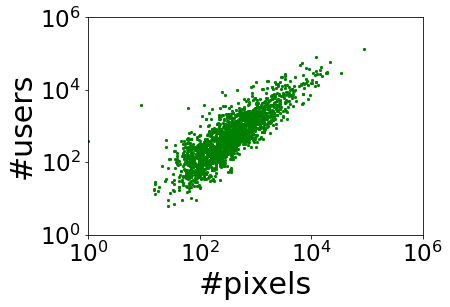

In [70]:
%matplotlib inline
def plot_pixels_vs_users(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,1000000)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_users(X, Y, "../plots/plot_pixels_vs_users.svg")

In [71]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#users', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Pixels_vs_Time'></a>
# Pixels vs Time

In [72]:
#Pixels vs. time per project
X,Y = Create_Array(pixels_per_proj, times_per_proj)

#Pixels vs. area: ratio and ID
ratios, IDs = Ratio(pixels_per_proj, times_per_proj, names)

In [73]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [74]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.14805446],
       [0.14805446, 1.        ]])

In [75]:
 #Time/Pixel
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/(1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", pixels: ", pix, ", time/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 0 , project:  (0,0) , time:  71.61916666666667 , pixels:  1 , time/pixel:  71.61916666666667        , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 1 , project:  The purple corner , time:  71.92555555555556 , pixels:  9 , time/pixel:  7.991728395061729        , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 2 , project:  Stealth Pepe , time:  69.48083333333334 , pixels:  15 , time/pixel:  4.632055555555556        , 
description:  Pepe the frog was placed and overwritten with prejudice many times, but this one survived by being tiny, the rarest of them all 

# 3 , project:  Remains of r/ockyt

In [76]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", pixels: ", pix, ", time/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  Rainbow Road , time:  73.80277777777778 , pixels:  88478 , time/pixel:  0.0008341370485067224         , 
description:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  Entire Dutch Area , time:  71.82083333333334 , pixels:  33887 , time/pixel:  0.0021194214103736927         , 
description:  Complete area built by Dutch subreddits 

# 3 , project:  Darth Plagueis The Wise , time:  71.8488888888889 , pixels:  21778 , time/pixel:  0.003299150008673381         , 
description:  One of the first additions to the map, this text of a meme from the prequel Star Wars movies started out as an uncoordinated attempt to write something everyone knew, and was refined to the masterpiece you see today. 

# 4 , project:  Hearts , time:  71.82055555555556 , pixels:  19036 , time/pixel:  0.0037728806238472136         , 
description:  What started with a few red hearts quickly became over one hundred hearts b

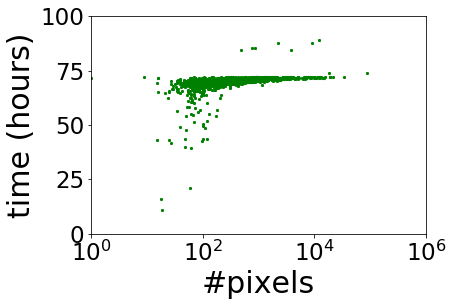

In [77]:
%matplotlib inline
Y= Y/(3600*1000)
def plot_pixels_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_times(X, Y, "../plots/plot_pixels_vs_times.svg")

In [78]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
#ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Pixels_vs_Area'></a>
# Pixels vs Area

In [31]:
#Pixels vs. area per project
X,Y = Create_Array(pixels_per_proj, area_per_proj)

#Pixels vs. area: ratio and ID
ratios, IDs = Ratio(pixels_per_proj, area_per_proj, names)

In [32]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [33]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.12282116],
       [-0.12282116,  1.        ]])

In [34]:
 #Area/Pixel
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ar = area_per_proj[proj] 
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", pixels: ", pix, ", area/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  (0,0) , area:  1.0 , pixels:  1 , area/pixel:  1.0        , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 1 , project:  The purple corner , area:  1.0 , pixels:  9 , area/pixel:  0.1111111111111111        , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 2 , project:  Stealth Pepe , area:  1.0 , pixels:  15 , area/pixel:  0.06666666666666667        , 
description:  Pepe the frog was placed and overwritten with prejudice many times, but this one survived by being tiny, the rarest of them all 

# 3 , project:  Tiny danish flag , area:  1.0 , pixels:  16 , area/pixel:  0.0625      

In [35]:
 #bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ar = area_per_proj[proj] 
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", pixels: ", pix, ", area/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  Rainbow Road , area:  0.09921175423454526 , pixels:  88281 , area/pixel:  1.1238177437335922e-06        , 
description:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  Transgender flag , area:  0.06001669648181276 , pixels:  12581 , area/pixel:  4.770423375074538e-06        , 
description:  A cross-shape in the colors of the transgender flag, representing people who do not identify with the gender they were assigned. Due to the fact that it's spanning the entire canvas, this piece was also called the Transcontinental Railroad. 

# 3 , project:  Entire Dutch Area , area:  0.41434096629627354 , pixels:  33746 , area/pixel:  1.2278224568727361e-05        , 
description:  Complete area built by Dutch subreddits 

# 4 , project:  The Green Lattice , area:  0.23979696472518458 , pixels:  14031 , area/pixel:  1.7090511348099535e-05        , 
description:  A collective who aimed to preserve art

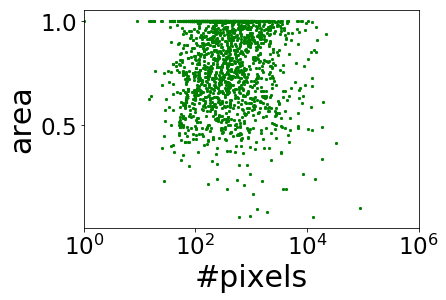

In [36]:
%matplotlib inline
def plot_pixels_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    #ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_area(X, Y, "../plots/plot_pixels_vs_area.svg")

5

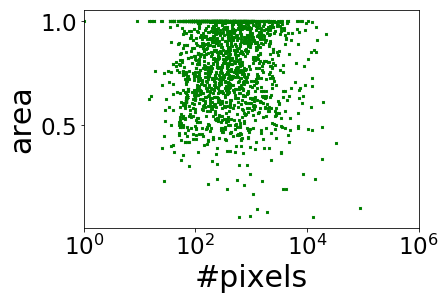

In [39]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Users_vs_Entropy'></a>
# Users_vs_Entropy

In [79]:
#Users vs. entropy per project

X,Y = Create_Array(users_per_proj, entropy_per_proj)

#Users vs. entropy: ratio and ID
ratios, IDs = Ratio(users_per_proj, entropy_per_proj, names)

In [81]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [82]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.11765793],
       [0.11765793, 1.        ]])

In [83]:
 #Entropy/user
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", users: ", usr, ", entropy/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  Bread , entropy:  1.2774791011509907 , users:  9 , entropy/user:  0.14194212235011008        , 
description:  It's bread. 

# 1 , project:  Bread , entropy:  1.3981439712463501 , users:  10 , entropy/user:  0.139814397124635        , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 2 , project:  Smiley Face , entropy:  0.6365141682948128 , users:  6 , entropy/user:  0.10608569471580213        , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  Minecraft Chicken , entropy:  1.4006876222916609 , users:  16 , entropy/user:  0.0875429763932288        , 
description:  A minecraft

In [84]:
 #Entropy/user
#Bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", users: ", usr, ", entropy/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  (0,0) , entropy:  0.0 , users:  380 , entropy/user:  0.0        , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  The Blue Corner , entropy:  0.4897081198748957 , users:  54723 , entropy/user:  8.948853678981338e-06        , 
description:  The Blue Corner was one of the earliest projects on /r/place.<br>It quickly grew to cover a significant part of the map, but later was pushed back to its current size. 

# 3 , project:  RuneScape disconnected message , entropy:  0.42979017472032577 , users:  40005 , entropy/user:  1.0743411441577946e-05        , 
description:  This message is displayed when an user loses connection to the server in the MMORPG Runescape. Built by /r/runescape and /r/2007scape. 

# 4 , project:  Darth Plagueis The Wise , entropy:  0.847417728798278 , users:  56669 , entropy/user:  1.4953814762891141e-05        , 
description:  One of the first additions to the m

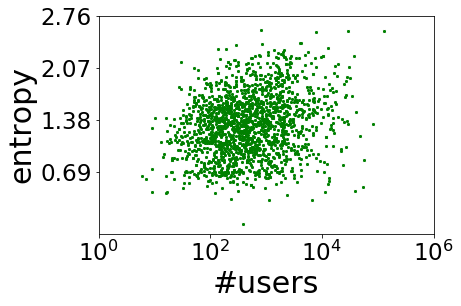

In [86]:
%matplotlib inline
def plot_users_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    ax.set_yticks(np.arange(0.69, math.exp(1)+.1, .69))
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_entropy(X, Y, "../plots/plot_users_vs_entropy.svg")

In [87]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
ax.set_yticks(np.arange(0.69, math.exp(1)+.1, .69))
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Users_vs_Time'></a>
# Users vs Time

In [88]:
#Users vs. time per project
X,Y = Create_Array(users_per_proj, times_per_proj)

#Users vs. time: ratio and ID
ratios, IDs = Ratio(users_per_proj, times_per_proj, names)

In [89]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [90]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.18703472],
       [0.18703472, 1.        ]])

In [91]:
#Time/User
#Top -10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/ (1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", users: ", usr, ", time/user: ", r, "\
        , \ndescription: ", desc, "\n")    

# 0 , project:  The R , time:  65.53111111111112 , users:  7 , time/user:  9.361587301587301         , 
description:  The R of the sub r/The_R 

# 1 , project:  CUL , time:  68.76416666666667 , users:  9 , time/user:  7.640462962962963         , 
description:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
This masterpiece is the work of Marvolo and Nicho. This is our gift to the internet. 

# 2 , project:  BIGBANG , time:  68.70333333333333 , users:  9 , time/user:  7.633703703703703         , 
description:  BIGBANG is a South Korean boy group who debuted in 2006 under YG Entertainment. The group, consisting of members T.O.P, Taeyang, Daesung, Seungri and leader G-Dragon are often labelled the 'Kings of K-pop' and can be considered the most influential boy group within Asia. Pictured to the left is the Bigbang crown which sits atop of the lightsticks which their fans (VIPs) wave and Bigbang concerts. 

# 3 , project:  Bre

In [92]:
#Time/User
#Bottom -10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", users: ", usr, ", time/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  Rainbow Road , time:  73.80277777777778 , users:  129675 , time/user:  0.0005691365165049376         , 
description:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  USA / Canvas Center , time:  88.87472222222222 , users:  80931 , time/user:  0.0010981542576049008         , 
description:  The center of the canvas was a controversial and disputed part of r/place. It began to be filled with numerous randomly placed pixels. As organized groups began creating masterpieces, the center began a white void, part of r/erase. As the original (dark) Void began to eat the center of the canvas, the USA Flag began to take shape covering a branch from the void. The flag took over the white void and a few projects including a smiley and a tree. Then the void reappeared in place and with other people erased most of the flag as RainbowRoad expanded where the flag was. Ireland saw an opportunity  and decid

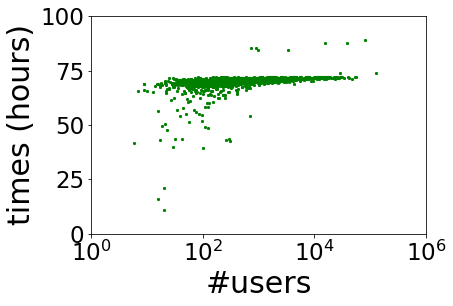

In [93]:
%matplotlib inline
Y = Y/(1000 * 60 * 60)
def plot_users_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_times(X, Y, "../plots/plot_users_vs_times.svg")

In [94]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

5

<a id='Users_vs_Area'></a>
# Users vs Area

In [41]:
#Users vs. area per project
X,Y = Create_Array(users_per_proj, area_per_proj)

#Users vs. area: ratio and ID
ratios, IDs = Ratio(users_per_proj, area_per_proj, names)

In [42]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [43]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.06862054],
       [-0.06862054,  1.        ]])

In [44]:
#Area/User
#Top -10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", users: ", usr, ", area/user: ", r, "\
        , \ndescription: ", desc, "\n")   

# 0 , project:  The R , area:  1.0 , users:  7 , area/user:  0.14285714285714285         , 
description:  The R of the sub r/The_R 

# 1 , project:  Smiley Face , area:  0.75 , users:  6 , area/user:  0.125         , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 2 , project:  CUL , area:  0.8909090909090909 , users:  9 , area/user:  0.09898989898989899         , 
description:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
This masterpiece is the work of Marvolo and Nicho. This is our gift to the internet. 

# 3 , project:  Tiny danish flag , area:  1.0 , users:  13 , area/user:  0.07692307692307693         , 
description:  denmark is a samll nation in the nothern part of europe 

# 4 , project:  Bread , area:  0.6041666666666666 , users:  9 , area/user:  0.06712962962962962         , 
description:  It's bread. 

# 5 , project:  Minecraft Chicken , area:  1.0 , users:  16 

In [45]:
#Area/User
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", users: ", usr, ", area/user: ", r, "\
        , \ndescription: ", desc, "\n")  

# 1 , project:  Rainbow Road , area:  0.09921175423454526 , users:  129675 , area/user:  7.650800403666493e-07         , 
description:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  Transgender flag , area:  0.06001669648181276 , users:  26985 , area/user:  2.224076208331027e-06         , 
description:  A cross-shape in the colors of the transgender flag, representing people who do not identify with the gender they were assigned. Due to the fact that it's spanning the entire canvas, this piece was also called the Transcontinental Railroad. 

# 3 , project:  The Green Lattice , area:  0.23979696472518458 , users:  27165 , area/user:  8.827423696859363e-06         , 
description:  A collective who aimed to preserve art in all its forms, avoid aggression, and build a cool green lattice. 

# 4 , project:  Rainbow Road Core , area:  0.33710782147591695 , users:  28921 , area/user:  1.1656160626393173e-05  

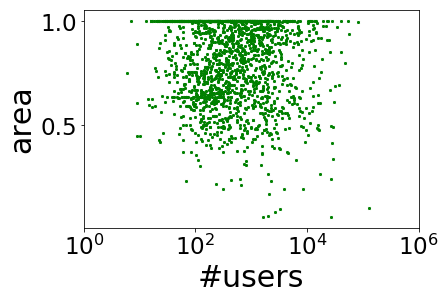

In [46]:
%matplotlib inline
def plot_users_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    #ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_area(X, Y, "../plots/plot_users_vs_area.svg")

5

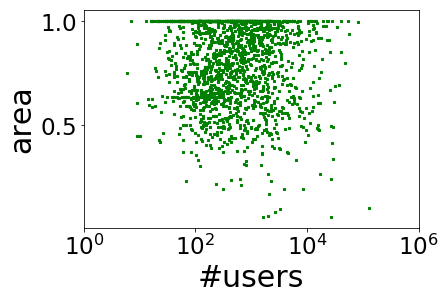

In [47]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Time_vs_Entropy'></a>
# Time vs Entropy

In [151]:
#Time vs. entropy per project

X,Y = Create_Array(times_per_proj, entropy_per_proj)

#Users vs. entropy: ratio and ID
ratios, IDs = Ratio(times_per_proj, entropy_per_proj, names)

In [133]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [134]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.14925468],
       [0.14925468, 1.        ]])

In [154]:
#Entropy/Time
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", time: ", tm, ", entropy/time: ", r, "\
        , \ndescription: ", desc, "\n")    

# 0 , project:  Seventeen , entropy:  0.6806294878916634 , time:  10.676111111111112 , entropy/time:  4.919179545105198e-15         , 
description:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 1 , project:  Tetris , entropy:  2.1516028645952874 , time:  39.6825 , entropy/time:  4.183676420389479e-15         , 
description:  Depicts all 7 tetris pieces 

# 2 , project:  TOPS , entropy:  1.0910839074486685 , time:  21.069166666666668 , entropy/time:  3.995818839802577e-15         , 
description:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 3 , project:  Make Trade Fair , entropy:  0.6365141682948128 , time:  16.12527777777778 , entropy/time:  3.045761333878892e-15         , 
description:  An organization supported by frontman Chris

In [136]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", time: ", tm, ", entropy/time: ", r, "\
        , \ndescription: ", desc, "\n")    

# 1 , project:  (0,0) , entropy:  0.0 , time:  71.61916666666667 , entropy/time:  0.0         , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  The Void , entropy:  0.3101432858015195 , time:  71.76583333333333 , entropy/time:  3.334568551370557e-16         , 
description:  The final core of the Void, with half of the Void's forces defending the core that destroyed Mexico, The Mona Lisa's face, The Oilers, and multiple other pixelart structures, and the other half of the Void's forces defending the Kekistan flag to the South. 

# 3 , project:  Frank Ocean - Channel Orange , entropy:  0.31716411734718 , time:  70.32472222222222 , entropy/time:  3.479934103604706e-16         , 
description:  Frank's 2012 album, Channel Orange. 

# 4 , project:  pr0gramm , entropy:  0.3307120958088891 , time:  71.21916666666667 , entropy/time:  3.5830114029082665e-16         , 
description:  Icon of the german ima

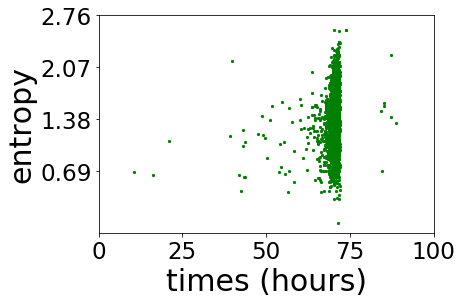

In [152]:
%matplotlib inline
X=X/(1000 * 60 * 60)
def plot_entropy_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('entropy', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_entropy_vs_times(X, Y, "../plots/plot_entropy_vs_times.svg")

5

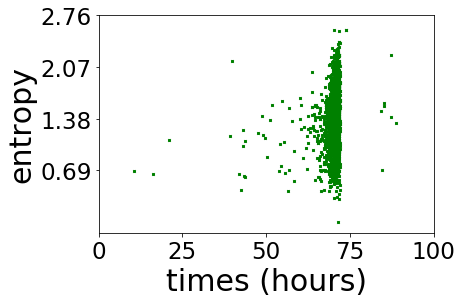

In [153]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('entropy', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Time_vs_Area'></a>
# Time vs Area

In [49]:
#Time vs. area per project

X,Y = Create_Array(times_per_proj, area_per_proj)

#Time vs. area: ratio and ID
ratios, IDs = Ratio(times_per_proj, area_per_proj, names)

In [50]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [51]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.00000000e+00, -8.87012764e-04],
       [-8.87012764e-04,  1.00000000e+00]])

In [53]:
#Area/Time
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]*(1000*3600)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    t = times_per_proj[proj]/(1000*3600)
    
    print("#", i, ", project: ", name, ", time: ", t, ", area: ", ar, ", area/time: ", r, "\
        , \ndescription: ", desc, "\n")  

# 0 , project:  Seventeen , time:  10.676111111111112 , area:  0.76 , area/time:  0.07118696987042723         , 
description:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 1 , project:  Make Trade Fair , time:  16.12527777777778 , area:  1.0 , area/time:  0.06201443558250504         , 
description:  An organization supported by frontman Chris Martin of Coldplay drawn by the nearby Coldplay redditors. 

# 2 , project:  TOPS , time:  21.069166666666668 , area:  1.0 , area/time:  0.04746272198710596         , 
description:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 3 , project:  Tetris , time:  39.6825 , area:  1.0 , area/time:  0.0252000252000252         , 
description:  Depicts all 7 tetris pieces 

# 4 , project:  Polyamory Flag

In [54]:
#Area/Time
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]*(1000*3600)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    t = times_per_proj[proj]/(1000*3600)
    
    print("#", i, ", project: ", name, ", time: ", t, ", area: ", ar, ", area/time: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  Transgender flag , time:  71.7675 , area:  0.06001669648181276 , area/time:  0.0008362656701405616         , 
description:  A cross-shape in the colors of the transgender flag, representing people who do not identify with the gender they were assigned. Due to the fact that it's spanning the entire canvas, this piece was also called the Transcontinental Railroad. 

# 2 , project:  The Dutch Border , time:  71.71055555555556 , area:  0.060002013490385586 , area/time:  0.0008367249845652201         , 
description:  The dutch border flag was used by the Netherlands to indicate their territory. Some of the Dutch planned to overtake the triangular area in this corner, with the Unregistered HyperCam 2, Rainbow Road and the right edge as borders. However, after some discussion of the Dutch diplomats with the makers of Pharah this plan was cancelled and an agreement was made not to expand in their direction. The first made steps of this plan, the orange colour and the border fla

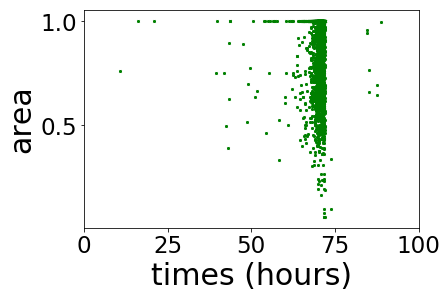

In [55]:
%matplotlib inline
X=X/(1000*3600)
def plot_area_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('area', fontsize=30)
    #ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_area_vs_times(X, Y, "../plots/plot_area_vs_times.svg")

5

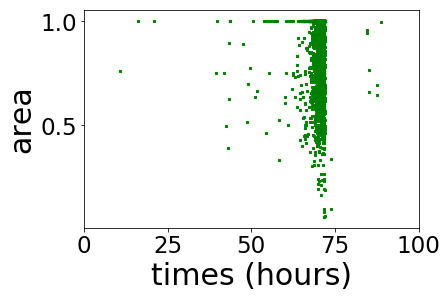

In [56]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('area', fontsize=30)
#ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Area_vs_Entropy'></a>
# Area vs Entropy

In [83]:
#Area vs. entropy per project

X,Y = Create_Array(area_per_proj, entropy_per_proj)

#Area vs. entropy: ratio and ID
ratios, IDs = Ratio(area_per_proj, entropy_per_proj, names)

In [84]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [85]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.29679611],
       [-0.29679611,  1.        ]])

In [87]:
#Entropy/Area
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj]
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", area: ", ar, ", entropy/area: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Transgender flag , entropy:  1.895098518780958 , area:  0.06001669648181276 , entropy/area:  31.576188458744006         , 
description:  A cross-shape in the colors of the transgender flag, representing people who do not identify with the gender they were assigned. Due to the fact that it's spanning the entire canvas, this piece was also called the Transcontinental Railroad. 

# 1 , project:  /r/parahumans worm , entropy:  1.6244986889937705 , area:  0.06153541749109616 , entropy/area:  26.39940956326211         , 
description:  It's a worm created by the subreddit /r/parahumans.
It doubles as a tail for "The Beast". Although it was developed independently initially, /r/Portugal suggested that its head popped up on their side, which was agreed upon. It also features a traditional Portuguese hat with national colors. 

# 2 , project:  Rainbow Road , entropy:  2.566608231891375 , area:  0.09921175423454526 , entropy/area:  25.8700015103421         , 
description:  One of 

In [88]:
#Entropy/Area
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj]
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", area: ", ar, ", entropy/area: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  (0,0) , entropy:  0.0 , area:  1.0 , entropy/area:  0.0         , 
description:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  Frank Ocean - Channel Orange , entropy:  0.31767876351237384 , area:  0.9976190476190476 , entropy/area:  0.31843694671884726         , 
description:  Frank's 2012 album, Channel Orange. 

# 3 , project:  pr0gramm , entropy:  0.3307120958088891 , area:  1.0 , entropy/area:  0.3307120958088891         , 
description:  Icon of the german imageboard pr0gramm.com 

# 4 , project:  King Viridian XV , entropy:  0.410116318288409 , area:  1.0 , entropy/area:  0.410116318288409         , 
description:  The personal logo of King Viridian XV, also known as /u/zurbayuluk52. 

# 5 , project:  Flag of the EU , entropy:  0.41892133912826657 , area:  1.0 , entropy/area:  0.41892133912826657         , 
description:  The first flag of the EU, which survived the void's assaults and st

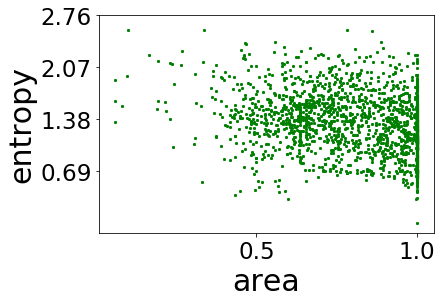

In [90]:
%matplotlib inline
def plot_entropy_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('entropy', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    #ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_entropy_vs_area(X, Y, "../plots/plot_entropy_vs_area.svg")

5

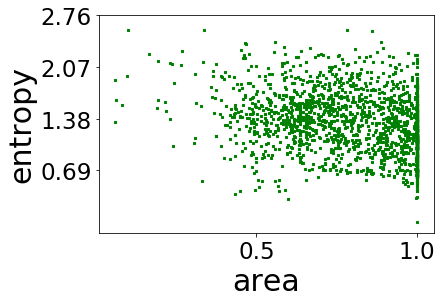

In [91]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('entropy', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
#ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Updates_per_time'></a>
# Updates per Time

In [4]:
#---already computed (first block)
#tile_updates, total_tile_updates = update_category_per_project()
#use tile_updates and total_tile_updates

In [29]:
def generate_figures_time(hour_marks, picID):
    begin_time = 1490918688000
    
    if picID is None:
            data = extract_canvas_color('../data/sorted_tile_placements.csv', 0, 1000, 0, 1000,\
                            begin_time+1000*60*60*hour_marks)
    else:
            data = extract_project_color('../data/sorted_tile_placements_proj.csv', picID, 
                            begin_time+1000*60*60*hour_marks)
    
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        draw_canvas(canvas_color_code_rgb(data[t]), tmp_file_name);

In [44]:
from canvas_vis import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

%matplotlib inline
def plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
       
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        arr_img = plt.imread(tmp_file_name, format='png')
        
        imagebox = OffsetImage(arr_img, zoom=zoom)
        imagebox.image.axes = ax
    
        ab = AnnotationBbox(imagebox, (hour_marks[t], up_line),
                        None,
                        xycoords='data',
                        pad=0.1)

        ax.add_artist(ab)
    
    ax.set_ylabel('update (%)', fontsize=20)
    ax.set_xlabel('time (hours)', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.set_xlim(0, 110)

    ax.set_xticks(np.arange(0,95, 24))
    ax.set_ylim(0, 5.2)
    ax.set_yticks(np.arange(0,1.3, .4))
    
    ax.vlines(np.array(hour_marks),ymin=0,ymax=up_line,color='k', linestyle='--')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')
    #ax.set_aspect(aspect=.2)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

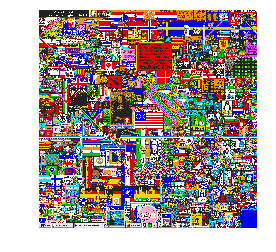

In [161]:
generate_figures_time(np.array([24, 48, 72, 96]), None)

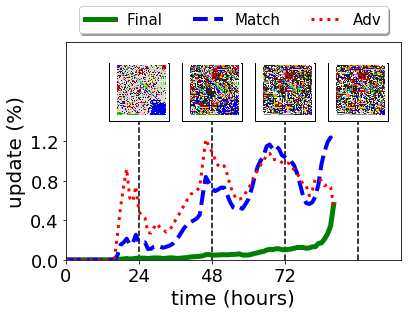

In [166]:
#zoom =.04 decides how large the figures should be

plot_updates_per_time_with_figure(total_tile_updates["final_updates"], total_tile_updates["agreeing_updates"],
    total_tile_updates["disagreeing_updates"], None, np.array([24, 48, 72, 96]), 1.7, .04,
    "../plots/plot_updates_time_total_fig.svg")

In [168]:
%matplotlib inline
def plot_updates_per_time_all_types(pixel, pixel_color, other, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
        
    ax.set_ylabel('update (%)', fontsize=30)
    ax.set_xlabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,97, 24))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

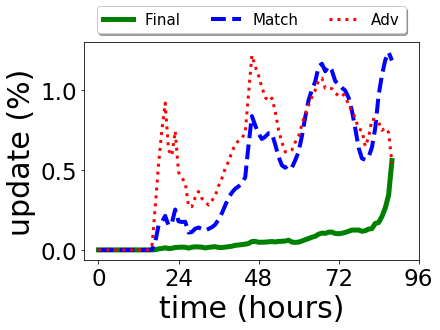

In [169]:
#total updates per time all types
plot_updates_per_time_all_types(total_tile_updates["final_updates"], total_tile_updates["agreeing_updates"],
    total_tile_updates["disagreeing_updates"], "../plots/plot_updates_time_total.svg")

5

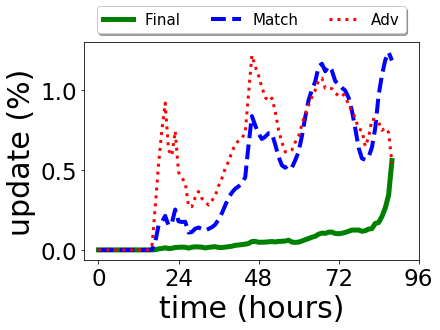

In [167]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

pixel = total_tile_updates["final_updates"]

pixel_color = total_tile_updates["agreeing_updates"]

other = total_tile_updates["disagreeing_updates"]

fig,ax = plt.subplots()
total = pixel+pixel_color+other
line1, = ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
line2, = ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
line3, = ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
        
ax.set_ylabel('update (%)', fontsize=30)
ax.set_xlabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xticks(np.arange(0,97, 24))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind, line):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}, {}".format(str(annot.xy[0]), 
                           str(np.around(annot.xy[1], decimals=2)))
    annot.set_text(text)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line1.contains(event)
        if cont:
            update_annot(ind, line1)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            cont, ind = line2.contains(event)
            
            if cont:
                update_annot(ind, line2)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                cont, ind = line3.contains(event)
            
                if cont:
                    update_annot(ind, line3)
                    annot.set_visible(True)
                    fig.canvas.draw_idle()
                else:
                    if vis:
                        annot.set_visible(False)
                    fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

## Example of some projects

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

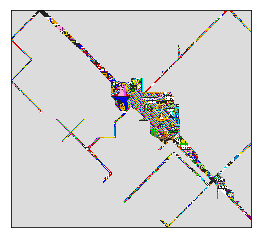

In [7]:
generate_figures_time(np.array([24, 48, 72, 96]), 286)

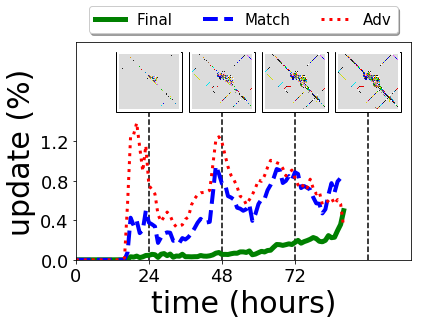

In [21]:
picID = 286

plot_updates_per_time_with_figure(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], picID, np.array([24, 48, 72, 96]), 1.8, 0.045, 
    "../plots/plot_updates_time_286_fig.svg")

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

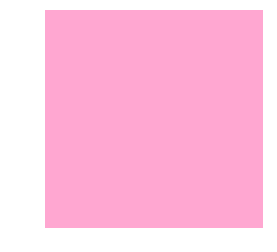

In [30]:
generate_figures_time(np.array([24, 48, 72, 96]), 1824)

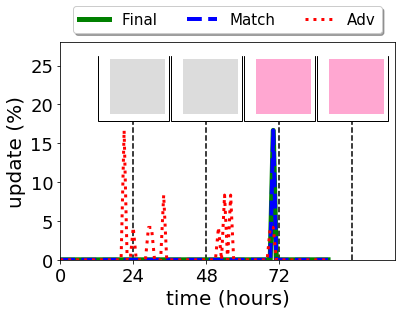

In [48]:
from canvas_vis import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

%matplotlib inline
def plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
       
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        arr_img = plt.imread(tmp_file_name, format='png')
        
        imagebox = OffsetImage(arr_img, zoom=zoom)
        imagebox.image.axes = ax
    
        ab = AnnotationBbox(imagebox, (hour_marks[t], up_line),
                        None,
                        xycoords='data',
                        pad=0.1)

        ax.add_artist(ab)
    
    ax.set_ylabel('update (%)', fontsize=20)
    ax.set_xlabel('time (hours)', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.set_xlim(0, 110)

    ax.set_xticks(np.arange(0,95, 24))
    ax.set_ylim(0, 28)
    #ax.set_yticks(np.arange(0,1.3, .4))
    
    ax.vlines(np.array(hour_marks),ymin=0,ymax=up_line,color='k', linestyle='--')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')
    #ax.set_aspect(aspect=.2)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

picID = 1824

plot_updates_per_time_with_figure(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], picID, np.array([24, 48, 72, 96]), 22., 0.045, 
    "../plots/plot_updates_time_1824_fig.svg")

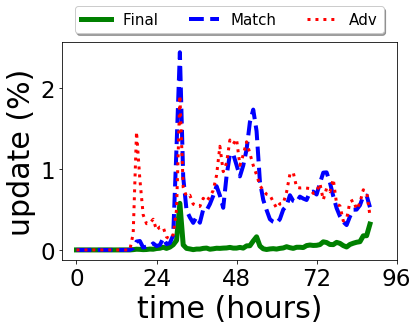

In [85]:
picID = 179
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_179.svg")

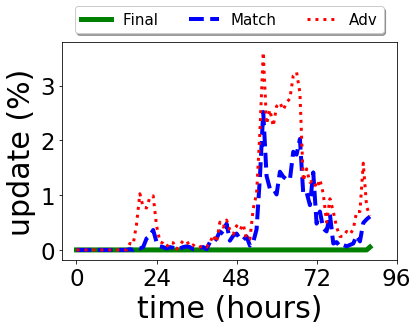

In [86]:
picID = 1493
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_1493.svg")

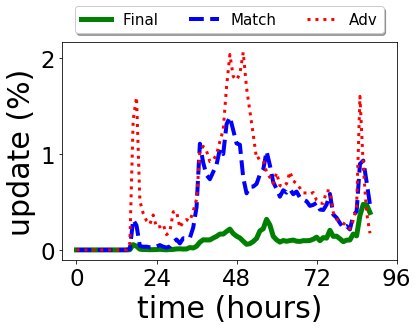

In [87]:
picID = 2
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_2.svg")

<a id='#Distance_users'></a>
# Distance (Users')

In [4]:
#Two types of distances: euclidean and cosine
# sample size denotes the number of considered users per project to compute the distance
sample_size=500
euc_dis,cos_dis,rand_dis = distance_per_project_all(input_file_proj,projects_to_remove, sample_size)

(array([ 12136.,   5870.,   8452.,  10470.,  12549.,  13939.,  16326.,
         17065.,  20590.,  19401.,  25604.,  24166.,  26695.,  34717.,
         38427.,  44552.,  55806.,  75689., 122862., 319909.]),
 array([0.        , 0.07070989, 0.14141978, 0.21212967, 0.28283956,
        0.35354945, 0.42425934, 0.49496923, 0.56567912, 0.63638901,
        0.7070989 , 0.77780879, 0.84851868, 0.91922857, 0.98993846,
        1.06064835, 1.13135824, 1.20206813, 1.27277802, 1.34348791,
        1.4141978 ]),
 <a list of 20 Patch objects>)

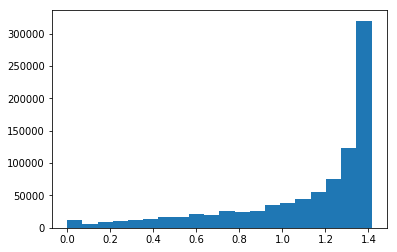

In [5]:
plt.hist(euc_dis.values(), bins=20)

(array([  2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   1.,   0.,   1.,   1.,   2.,   5.,  16., 469.]),
 array([0.        , 0.07071068, 0.14142136, 0.21213203, 0.28284271,
        0.35355339, 0.42426407, 0.49497475, 0.56568542, 0.6363961 ,
        0.70710678, 0.77781746, 0.84852814, 0.91923882, 0.98994949,
        1.06066017, 1.13137085, 1.20208153, 1.27279221, 1.34350288,
        1.41421356]),
 <a list of 20 Patch objects>)

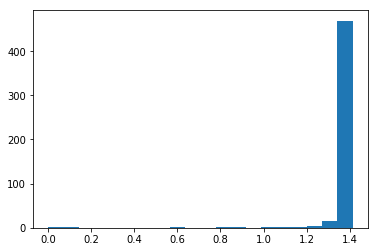

In [6]:
plt.hist(rand_dis[0], bins=20)

(array([ 42226.,  26066.,  24231.,  23723.,  20552.,  24627.,  21235.,
         21573.,  24810.,  23016.,  26718.,  29217.,  29800.,  33015.,
         37139.,  44400.,  55108.,  73168., 108191., 216410.]),
 array([-2.22044605e-16,  4.99988856e-02,  9.99977712e-02,  1.49996657e-01,
         1.99995542e-01,  2.49994428e-01,  2.99993314e-01,  3.49992199e-01,
         3.99991085e-01,  4.49989970e-01,  4.99988856e-01,  5.49987742e-01,
         5.99986627e-01,  6.49985513e-01,  6.99984398e-01,  7.49983284e-01,
         7.99982170e-01,  8.49981055e-01,  8.99979941e-01,  9.49978826e-01,
         9.99977712e-01]),
 <a list of 20 Patch objects>)

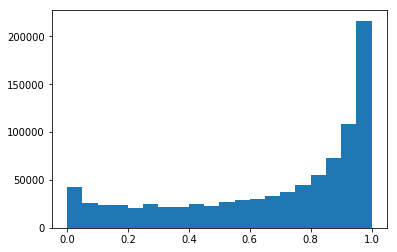

In [8]:
plt.hist(cos_dis.values(), bins=20)

(array([  3.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          1.,   0.,   1.,   2.,   1.,   5.,  13.,   9., 461.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

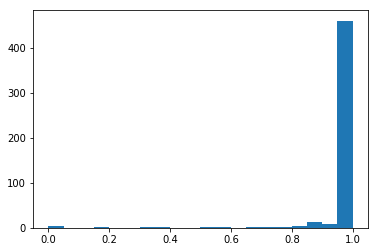

In [9]:
plt.hist(rand_dis[1], bins=20)

In [10]:
#Test: the users' involvemnet in a project
#project_per_user_lst=projects_per_user_list(input_file_proj, projects_to_remove)
#users_per_proj_lst=users_per_project_list(input_file_proj, projects_to_remove)